In [1]:
import os
import sys
sys.path.append("../")
import hydra
import numpy as np
from tqdm import tqdm
from moviepy.editor import ImageSequenceClip
from PIL import Image
from matplotlib import pyplot as plt
import torch
import dill
from torch.utils.data import DataLoader
import h5py
import shutil

from diffusion_policy.dataset.robomimic_replay_image_dataset import RobomimicReplayImageDataset
from diffusion_policy.common.replay_buffer import ReplayBuffer
from diffusion_policy.workspace.base_workspace import BaseWorkspace
from diffusion_policy.common.pytorch_util import dict_apply

In [2]:
# zarr_path = os.path.expanduser('../data/robomimic/datasets/lift/ph/image_abs.hdf5.zarr.zip')
dataset_path = os.path.expanduser('../data/robomimic/datasets/lift/ph/image_abs.hdf5')
# replay_buffer = ReplayBuffer.copy_from_path(zarr_path, keys=None)

# Define shape metadata
shape_meta = {
    'action': {
        'shape': [7]
    },
    'obs': {
        'object': {
            'shape': [10]
        },
        'agentview_image': {
            'shape': [3, 84, 84],
            'type': 'rgb'
        },
        'robot0_eef_pos': {
            'shape': [3]
        },
        'robot0_eef_quat': {
            'shape': [4]
        },
        'robot0_eye_in_hand_image': {
            'shape': [3, 84, 84],
            'type': 'rgb'
        },
        'robot0_gripper_qpos': {
            'shape': [2]
        }
    }
}

# Create dataset
dataset = RobomimicReplayImageDataset(
    dataset_path=dataset_path,
    shape_meta=shape_meta,
    horizon=2,
    pad_before=1,
    pad_after=1,
    rotation_rep='rotation_6d',
    seed=42,
    val_ratio=0.0,
    use_legacy_normalizer=False,
)

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
iterator = iter(dataloader)

Loading lowdim data:   0%|          | 0/5 [00:00<?, ?it/s]

Loading image data: 100%|██████████| 19332/19332 [00:07<00:00, 2512.70it/s]


In [3]:
# Paths
dataset_path = "../data/robomimic/datasets/lift/ph/low_dim_abs_with_attention.hdf5"
new_dataset_path = "../data/robomimic/datasets/lift/ph/low_dim_abs_with_attention_2.hdf5"

# First, copy the entire file to preserve all structure
shutil.copy(dataset_path, new_dataset_path)

file = h5py.File(new_dataset_path, 'r+')


In [4]:
num_demos = len(file['data'].keys())
print(f"Number of demonstrations: {num_demos}")

length_of_each_demo = list()
for i in tqdm(range(num_demos)):
    demo_key = f'data/demo_{i}'
    demo = file[demo_key]
    length_of_each_demo.append(demo.attrs['num_samples'])
length_of_each_demo = np.array(length_of_each_demo)

assert (length_of_each_demo+1).sum() == len(dataset)


Number of demonstrations: 200


100%|██████████| 200/200 [00:00<00:00, 33939.99it/s]


  0%|          | 0/200 [00:02<?, ?it/s]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_0.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_0.mp4



  0%|          | 1/200 [00:02<09:27,  2.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_0.mp4


  0%|          | 1/200 [00:05<09:27,  2.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_1.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_1.mp4



  1%|          | 2/200 [00:05<09:00,  2.73s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_1.mp4


  1%|          | 2/200 [00:07<09:00,  2.73s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_2.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_2.mp4



  2%|▏         | 3/200 [00:08<08:44,  2.66s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_2.mp4


  2%|▏         | 3/200 [00:10<08:44,  2.66s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_3.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_3.mp4



  2%|▏         | 4/200 [00:10<08:25,  2.58s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_3.mp4


  2%|▏         | 4/200 [00:12<08:25,  2.58s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_4.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_4.mp4



  2%|▎         | 5/200 [00:12<08:06,  2.50s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_4.mp4


  2%|▎         | 5/200 [00:15<08:06,  2.50s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_5.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_5.mp4



  3%|▎         | 6/200 [00:15<08:14,  2.55s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_5.mp4


  3%|▎         | 6/200 [00:17<08:14,  2.55s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_6.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_6.mp4



Moviepy - Done !


  4%|▎         | 7/200 [00:17<07:42,  2.40s/it]

Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_6.mp4


  4%|▎         | 7/200 [00:19<07:42,  2.40s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_7.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_7.mp4



  4%|▎         | 7/200 [00:19<07:42,  2.40s/it]

Moviepy - Done !


  4%|▍         | 8/200 [00:19<07:18,  2.28s/it]

Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_7.mp4


  4%|▍         | 8/200 [00:21<07:18,  2.28s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_8.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_8.mp4



  4%|▍         | 9/200 [00:21<06:42,  2.11s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_8.mp4


  4%|▍         | 9/200 [00:23<06:42,  2.11s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_9.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_9.mp4



  5%|▌         | 10/200 [00:23<06:40,  2.11s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_9.mp4


  5%|▌         | 10/200 [00:25<06:40,  2.11s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_10.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_10.mp4



  6%|▌         | 11/200 [00:25<06:57,  2.21s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_10.mp4


  6%|▌         | 11/200 [00:27<06:57,  2.21s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_11.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_11.mp4



  6%|▌         | 12/200 [00:27<06:41,  2.13s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_11.mp4


  6%|▌         | 12/200 [00:29<06:41,  2.13s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_12.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_12.mp4



  6%|▋         | 13/200 [00:30<06:44,  2.16s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_12.mp4


  6%|▋         | 13/200 [00:32<06:44,  2.16s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_13.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_13.mp4



  7%|▋         | 14/200 [00:32<07:11,  2.32s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_13.mp4


  7%|▋         | 14/200 [00:34<07:11,  2.32s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_14.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_14.mp4



  8%|▊         | 15/200 [00:34<06:58,  2.26s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_14.mp4


  8%|▊         | 15/200 [00:36<06:58,  2.26s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_15.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_15.mp4



  8%|▊         | 16/200 [00:36<06:44,  2.20s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_15.mp4


  8%|▊         | 16/200 [00:38<06:44,  2.20s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_16.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_16.mp4



  8%|▊         | 17/200 [00:38<06:31,  2.14s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_16.mp4


  8%|▊         | 17/200 [00:40<06:31,  2.14s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_17.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_17.mp4



  9%|▉         | 18/200 [00:40<06:06,  2.01s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_17.mp4


  9%|▉         | 18/200 [00:42<06:06,  2.01s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_18.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_18.mp4



 10%|▉         | 19/200 [00:42<06:04,  2.01s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_18.mp4


 10%|▉         | 19/200 [00:44<06:04,  2.01s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_19.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_19.mp4



 10%|█         | 20/200 [00:44<06:13,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_19.mp4


 10%|█         | 20/200 [00:46<06:13,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_20.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_20.mp4



 10%|█         | 21/200 [00:46<06:03,  2.03s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_20.mp4


 10%|█         | 21/200 [00:49<06:03,  2.03s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_21.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_21.mp4



 11%|█         | 22/200 [00:49<06:24,  2.16s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_21.mp4


 11%|█         | 22/200 [00:50<06:24,  2.16s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_22.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_22.mp4



 12%|█▏        | 23/200 [00:51<06:05,  2.07s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_22.mp4


 12%|█▏        | 23/200 [00:52<06:05,  2.07s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_23.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_23.mp4



 12%|█▏        | 24/200 [00:53<05:54,  2.01s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_23.mp4


 12%|█▏        | 24/200 [00:55<05:54,  2.01s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_24.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_24.mp4



 12%|█▎        | 25/200 [00:55<06:07,  2.10s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_24.mp4


 12%|█▎        | 25/200 [00:57<06:07,  2.10s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_25.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_25.mp4



 13%|█▎        | 26/200 [00:57<05:57,  2.05s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_25.mp4


 13%|█▎        | 26/200 [00:58<05:57,  2.05s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_26.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_26.mp4



 14%|█▎        | 27/200 [00:58<05:36,  1.94s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_26.mp4


 14%|█▎        | 27/200 [01:00<05:36,  1.94s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_27.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_27.mp4



 14%|█▍        | 28/200 [01:00<05:31,  1.93s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_27.mp4


 14%|█▍        | 28/200 [01:02<05:31,  1.93s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_28.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_28.mp4



 14%|█▍        | 29/200 [01:02<05:34,  1.95s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_28.mp4


 14%|█▍        | 29/200 [01:04<05:34,  1.95s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_29.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_29.mp4



 15%|█▌        | 30/200 [01:04<05:10,  1.83s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_29.mp4


 15%|█▌        | 30/200 [01:06<05:10,  1.83s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_30.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_30.mp4



 16%|█▌        | 31/200 [01:06<05:08,  1.82s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_30.mp4


 16%|█▌        | 31/200 [01:07<05:08,  1.82s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_31.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_31.mp4



Moviepy - Done !


 16%|█▌        | 32/200 [01:07<04:54,  1.75s/it]

Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_31.mp4


 16%|█▌        | 32/200 [01:10<04:54,  1.75s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_32.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_32.mp4



 16%|█▋        | 33/200 [01:10<05:41,  2.04s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_32.mp4


 16%|█▋        | 33/200 [01:12<05:41,  2.04s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_33.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_33.mp4



 17%|█▋        | 34/200 [01:12<05:53,  2.13s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_33.mp4


 17%|█▋        | 34/200 [01:14<05:53,  2.13s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_34.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_34.mp4



 18%|█▊        | 35/200 [01:14<05:38,  2.05s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_34.mp4


 18%|█▊        | 35/200 [01:17<05:38,  2.05s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_35.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_35.mp4



 18%|█▊        | 36/200 [01:17<05:59,  2.19s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_35.mp4


 18%|█▊        | 36/200 [01:18<05:59,  2.19s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_36.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_36.mp4



 18%|█▊        | 37/200 [01:19<05:37,  2.07s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_36.mp4


 18%|█▊        | 37/200 [01:21<05:37,  2.07s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_37.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_37.mp4



 19%|█▉        | 38/200 [01:21<05:41,  2.11s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_37.mp4


 19%|█▉        | 38/200 [01:23<05:41,  2.11s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_38.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_38.mp4



 20%|█▉        | 39/200 [01:23<05:37,  2.10s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_38.mp4


 20%|█▉        | 39/200 [01:24<05:37,  2.10s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_39.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_39.mp4



 20%|██        | 40/200 [01:24<05:10,  1.94s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_39.mp4


 20%|██        | 40/200 [01:26<05:10,  1.94s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_40.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_40.mp4



 20%|██        | 41/200 [01:26<04:46,  1.80s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_40.mp4


 20%|██        | 41/200 [01:28<04:46,  1.80s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_41.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_41.mp4



 21%|██        | 42/200 [01:28<05:03,  1.92s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_41.mp4


 21%|██        | 42/200 [01:30<05:03,  1.92s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_42.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_42.mp4



 22%|██▏       | 43/200 [01:30<05:14,  2.01s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_42.mp4


 22%|██▏       | 43/200 [01:31<05:14,  2.01s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_43.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_43.mp4



 22%|██▏       | 44/200 [01:32<04:45,  1.83s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_43.mp4


 22%|██▏       | 44/200 [01:33<04:45,  1.83s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_44.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_44.mp4



 22%|██▎       | 45/200 [01:33<04:42,  1.82s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_44.mp4


 22%|██▎       | 45/200 [01:35<04:42,  1.82s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_45.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_45.mp4



 23%|██▎       | 46/200 [01:35<04:48,  1.88s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_45.mp4


 23%|██▎       | 46/200 [01:37<04:48,  1.88s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_46.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_46.mp4



 24%|██▎       | 47/200 [01:37<04:42,  1.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_46.mp4


 24%|██▎       | 47/200 [01:39<04:42,  1.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_47.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_47.mp4



 24%|██▍       | 48/200 [01:39<04:24,  1.74s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_47.mp4


 24%|██▍       | 48/200 [01:41<04:24,  1.74s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_48.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_48.mp4



 24%|██▍       | 49/200 [01:41<04:43,  1.88s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_48.mp4


 24%|██▍       | 49/200 [01:43<04:43,  1.88s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_49.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_49.mp4



 25%|██▌       | 50/200 [01:43<04:41,  1.88s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_49.mp4


 25%|██▌       | 50/200 [01:44<04:41,  1.88s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_50.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_50.mp4



 26%|██▌       | 51/200 [01:45<04:34,  1.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_50.mp4


 26%|██▌       | 51/200 [01:46<04:34,  1.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_51.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_51.mp4



 26%|██▌       | 52/200 [01:46<04:33,  1.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_51.mp4


 26%|██▌       | 52/200 [01:48<04:33,  1.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_52.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_52.mp4



 26%|██▋       | 53/200 [01:48<04:30,  1.84s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_52.mp4


 26%|██▋       | 53/200 [01:50<04:30,  1.84s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_53.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_53.mp4



 27%|██▋       | 54/200 [01:51<04:52,  2.00s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_53.mp4


 27%|██▋       | 54/200 [01:52<04:52,  2.00s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_54.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_54.mp4



 28%|██▊       | 55/200 [01:52<04:37,  1.91s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_54.mp4


 28%|██▊       | 55/200 [01:55<04:37,  1.91s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_55.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_55.mp4



 28%|██▊       | 56/200 [01:55<04:59,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_55.mp4


 28%|██▊       | 56/200 [01:56<04:59,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_56.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_56.mp4



 28%|██▊       | 57/200 [01:56<04:35,  1.93s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_56.mp4


 28%|██▊       | 57/200 [01:58<04:35,  1.93s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_57.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_57.mp4



 29%|██▉       | 58/200 [01:58<04:13,  1.78s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_57.mp4


 29%|██▉       | 58/200 [01:59<04:13,  1.78s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_58.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_58.mp4



 30%|██▉       | 59/200 [01:59<03:55,  1.67s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_58.mp4


 30%|██▉       | 59/200 [02:01<03:55,  1.67s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_59.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_59.mp4



 30%|██▉       | 59/200 [02:01<03:55,  1.67s/it]

Moviepy - Done !


 30%|███       | 60/200 [02:01<03:55,  1.68s/it]

Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_59.mp4


 30%|███       | 60/200 [02:02<03:55,  1.68s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_60.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_60.mp4



 30%|███       | 61/200 [02:03<03:50,  1.66s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_60.mp4


 30%|███       | 61/200 [02:05<03:50,  1.66s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_61.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_61.mp4



 31%|███       | 62/200 [02:05<04:13,  1.84s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_61.mp4


 31%|███       | 62/200 [02:07<04:13,  1.84s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_62.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_62.mp4



 32%|███▏      | 63/200 [02:07<04:13,  1.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_62.mp4


 32%|███▏      | 63/200 [02:08<04:13,  1.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_63.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_63.mp4



 32%|███▏      | 64/200 [02:08<04:04,  1.80s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_63.mp4


 32%|███▏      | 64/200 [02:10<04:04,  1.80s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_64.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_64.mp4



 32%|███▎      | 65/200 [02:11<04:17,  1.91s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_64.mp4


 32%|███▎      | 65/200 [02:12<04:17,  1.91s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_65.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_65.mp4



 33%|███▎      | 66/200 [02:12<03:54,  1.75s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_65.mp4


 33%|███▎      | 66/200 [02:13<03:54,  1.75s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_66.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_66.mp4



 34%|███▎      | 67/200 [02:14<03:45,  1.70s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_66.mp4


 34%|███▎      | 67/200 [02:15<03:45,  1.70s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_67.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_67.mp4



 34%|███▍      | 68/200 [02:15<03:40,  1.67s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_67.mp4


 34%|███▍      | 68/200 [02:16<03:40,  1.67s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_68.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_68.mp4



 34%|███▍      | 69/200 [02:17<03:31,  1.61s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_68.mp4


 34%|███▍      | 69/200 [02:18<03:31,  1.61s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_69.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_69.mp4



 35%|███▌      | 70/200 [02:18<03:29,  1.61s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_69.mp4


 35%|███▌      | 70/200 [02:20<03:29,  1.61s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_70.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_70.mp4



 36%|███▌      | 71/200 [02:20<03:37,  1.68s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_70.mp4


 36%|███▌      | 71/200 [02:22<03:37,  1.68s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_71.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_71.mp4



 36%|███▌      | 72/200 [02:22<03:38,  1.71s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_71.mp4


 36%|███▌      | 72/200 [02:23<03:38,  1.71s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_72.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_72.mp4



 36%|███▌      | 72/200 [02:23<03:38,  1.71s/it]

Moviepy - Done !


 36%|███▋      | 73/200 [02:23<03:26,  1.62s/it]

Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_72.mp4


 36%|███▋      | 73/200 [02:24<03:26,  1.62s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_73.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_73.mp4



 37%|███▋      | 74/200 [02:25<03:11,  1.52s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_73.mp4


 37%|███▋      | 74/200 [02:26<03:11,  1.52s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_74.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_74.mp4



 38%|███▊      | 75/200 [02:26<03:25,  1.65s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_74.mp4


 38%|███▊      | 75/200 [02:28<03:25,  1.65s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_75.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_75.mp4



 38%|███▊      | 76/200 [02:28<03:11,  1.54s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_75.mp4


 38%|███▊      | 76/200 [02:29<03:11,  1.54s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_76.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_76.mp4



 38%|███▊      | 77/200 [02:30<03:22,  1.65s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_76.mp4


 38%|███▊      | 77/200 [02:31<03:22,  1.65s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_77.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_77.mp4



 39%|███▉      | 78/200 [02:31<03:13,  1.59s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_77.mp4


 39%|███▉      | 78/200 [02:33<03:13,  1.59s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_78.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_78.mp4



 40%|███▉      | 79/200 [02:33<03:18,  1.64s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_78.mp4


 40%|███▉      | 79/200 [02:34<03:18,  1.64s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_79.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_79.mp4



 40%|████      | 80/200 [02:35<03:20,  1.67s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_79.mp4


 40%|████      | 80/200 [02:36<03:20,  1.67s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_80.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_80.mp4



 40%|████      | 81/200 [02:36<03:13,  1.63s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_80.mp4


 40%|████      | 81/200 [02:37<03:13,  1.63s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_81.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_81.mp4



 41%|████      | 82/200 [02:38<03:03,  1.56s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_81.mp4


 41%|████      | 82/200 [02:39<03:03,  1.56s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_82.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_82.mp4



 42%|████▏     | 83/200 [02:39<03:12,  1.65s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_82.mp4


 42%|████▏     | 83/200 [02:41<03:12,  1.65s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_83.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_83.mp4



 42%|████▏     | 84/200 [02:42<03:30,  1.82s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_83.mp4


 42%|████▏     | 84/200 [02:44<03:30,  1.82s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_84.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_84.mp4



 42%|████▎     | 85/200 [02:44<03:43,  1.94s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_84.mp4


 42%|████▎     | 85/200 [02:45<03:43,  1.94s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_85.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_85.mp4



 43%|████▎     | 86/200 [02:46<03:37,  1.91s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_85.mp4


 43%|████▎     | 86/200 [02:47<03:37,  1.91s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_86.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_86.mp4



 44%|████▎     | 87/200 [02:47<03:19,  1.76s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_86.mp4


 44%|████▎     | 87/200 [02:48<03:19,  1.76s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_87.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_87.mp4



 44%|████▍     | 88/200 [02:49<03:08,  1.69s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_87.mp4


 44%|████▍     | 88/200 [02:50<03:08,  1.69s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_88.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_88.mp4



 44%|████▍     | 89/200 [02:50<03:00,  1.63s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_88.mp4


 44%|████▍     | 89/200 [02:52<03:00,  1.63s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_89.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_89.mp4



 45%|████▌     | 90/200 [02:52<03:11,  1.74s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_89.mp4


 45%|████▌     | 90/200 [02:54<03:11,  1.74s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_90.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_90.mp4



 46%|████▌     | 91/200 [02:54<03:10,  1.75s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_90.mp4


 46%|████▌     | 91/200 [02:55<03:10,  1.75s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_91.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_91.mp4



 46%|████▌     | 92/200 [02:55<02:57,  1.64s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_91.mp4


 46%|████▌     | 92/200 [02:57<02:57,  1.64s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_92.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_92.mp4



 46%|████▋     | 93/200 [02:57<03:14,  1.82s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_92.mp4


 46%|████▋     | 93/200 [02:59<03:14,  1.82s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_93.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_93.mp4



 47%|████▋     | 94/200 [02:59<03:18,  1.88s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_93.mp4


 47%|████▋     | 94/200 [03:01<03:18,  1.88s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_94.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_94.mp4



 48%|████▊     | 95/200 [03:02<03:23,  1.94s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_94.mp4


 48%|████▊     | 95/200 [03:03<03:23,  1.94s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_95.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_95.mp4



 48%|████▊     | 96/200 [03:03<03:19,  1.92s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_95.mp4


 48%|████▊     | 96/200 [03:06<03:19,  1.92s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_96.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_96.mp4



 48%|████▊     | 97/200 [03:06<03:35,  2.09s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_96.mp4


 48%|████▊     | 97/200 [03:08<03:35,  2.09s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_97.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_97.mp4



 49%|████▉     | 98/200 [03:08<03:37,  2.13s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_97.mp4


 49%|████▉     | 98/200 [03:10<03:37,  2.13s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_98.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_98.mp4



 50%|████▉     | 99/200 [03:10<03:26,  2.05s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_98.mp4


 50%|████▉     | 99/200 [03:12<03:26,  2.05s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_99.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_99.mp4



 50%|█████     | 100/200 [03:12<03:19,  1.99s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_99.mp4


 50%|█████     | 100/200 [03:14<03:19,  1.99s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_100.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_100.mp4



 50%|█████     | 101/200 [03:14<03:14,  1.97s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_100.mp4


 50%|█████     | 101/200 [03:15<03:14,  1.97s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_101.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_101.mp4



 51%|█████     | 102/200 [03:16<03:05,  1.90s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_101.mp4


 51%|█████     | 102/200 [03:18<03:05,  1.90s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_102.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_102.mp4



 52%|█████▏    | 103/200 [03:18<03:21,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_102.mp4


 52%|█████▏    | 103/200 [03:20<03:21,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_103.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_103.mp4



 52%|█████▏    | 104/200 [03:20<03:24,  2.13s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_103.mp4


 52%|█████▏    | 104/200 [03:22<03:24,  2.13s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_104.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_104.mp4



 52%|█████▎    | 105/200 [03:22<03:18,  2.09s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_104.mp4


 52%|█████▎    | 105/200 [03:24<03:18,  2.09s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_105.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_105.mp4



 53%|█████▎    | 106/200 [03:25<03:25,  2.18s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_105.mp4


 53%|█████▎    | 106/200 [03:27<03:25,  2.18s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_106.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_106.mp4



 54%|█████▎    | 107/200 [03:27<03:19,  2.15s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_106.mp4


 54%|█████▎    | 107/200 [03:29<03:19,  2.15s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_107.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_107.mp4



 54%|█████▍    | 108/200 [03:30<03:37,  2.37s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_107.mp4


 54%|█████▍    | 108/200 [03:31<03:37,  2.37s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_108.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_108.mp4



 55%|█████▍    | 109/200 [03:31<03:16,  2.16s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_108.mp4


 55%|█████▍    | 109/200 [03:33<03:16,  2.16s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_109.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_109.mp4



 55%|█████▌    | 110/200 [03:33<03:12,  2.14s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_109.mp4


 55%|█████▌    | 110/200 [03:35<03:12,  2.14s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_110.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_110.mp4



 56%|█████▌    | 111/200 [03:35<03:01,  2.03s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_110.mp4


 56%|█████▌    | 111/200 [03:37<03:01,  2.03s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_111.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_111.mp4



 56%|█████▌    | 112/200 [03:37<02:52,  1.96s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_111.mp4


 56%|█████▌    | 112/200 [03:38<02:52,  1.96s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_112.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_112.mp4



 56%|█████▋    | 113/200 [03:39<02:44,  1.89s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_112.mp4


 56%|█████▋    | 113/200 [03:40<02:44,  1.89s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_113.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_113.mp4



 57%|█████▋    | 114/200 [03:40<02:39,  1.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_113.mp4


 57%|█████▋    | 114/200 [03:42<02:39,  1.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_114.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_114.mp4



 57%|█████▊    | 115/200 [03:42<02:37,  1.85s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_114.mp4


 57%|█████▊    | 115/200 [03:44<02:37,  1.85s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_115.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_115.mp4



 58%|█████▊    | 116/200 [03:44<02:41,  1.92s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_115.mp4


 58%|█████▊    | 116/200 [03:47<02:41,  1.92s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_116.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_116.mp4



 58%|█████▊    | 117/200 [03:47<02:58,  2.16s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_116.mp4


 58%|█████▊    | 117/200 [03:49<02:58,  2.16s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_117.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_117.mp4



 59%|█████▉    | 118/200 [03:49<02:59,  2.19s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_117.mp4


 59%|█████▉    | 118/200 [03:52<02:59,  2.19s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_118.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_118.mp4



 60%|█████▉    | 119/200 [03:52<03:03,  2.26s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_118.mp4


 60%|█████▉    | 119/200 [03:54<03:03,  2.26s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_119.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_119.mp4



 60%|██████    | 120/200 [03:54<03:03,  2.29s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_119.mp4


 60%|██████    | 120/200 [03:57<03:03,  2.29s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_120.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_120.mp4



 60%|██████    | 121/200 [03:57<03:26,  2.61s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_120.mp4


 60%|██████    | 121/200 [04:00<03:26,  2.61s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_121.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_121.mp4



 61%|██████    | 122/200 [04:00<03:15,  2.51s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_121.mp4


 61%|██████    | 122/200 [04:02<03:15,  2.51s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_122.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_122.mp4



 62%|██████▏   | 123/200 [04:03<03:18,  2.58s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_122.mp4


 62%|██████▏   | 123/200 [04:04<03:18,  2.58s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_123.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_123.mp4



 62%|██████▏   | 124/200 [04:05<03:06,  2.46s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_123.mp4


 62%|██████▏   | 124/200 [04:06<03:06,  2.46s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_124.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_124.mp4



 62%|██████▎   | 125/200 [04:07<02:52,  2.30s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_124.mp4


 62%|██████▎   | 125/200 [04:09<02:52,  2.30s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_125.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_125.mp4



 63%|██████▎   | 126/200 [04:09<02:54,  2.36s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_125.mp4


 63%|██████▎   | 126/200 [04:11<02:54,  2.36s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_126.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_126.mp4



 64%|██████▎   | 127/200 [04:12<02:54,  2.39s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_126.mp4


 64%|██████▎   | 127/200 [04:14<02:54,  2.39s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_127.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_127.mp4



 64%|██████▍   | 128/200 [04:14<02:55,  2.43s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_127.mp4


 64%|██████▍   | 128/200 [04:16<02:55,  2.43s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_128.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_128.mp4



 64%|██████▍   | 129/200 [04:17<02:52,  2.44s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_128.mp4


 64%|██████▍   | 129/200 [04:19<02:52,  2.44s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_129.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_129.mp4



 65%|██████▌   | 130/200 [04:19<02:45,  2.36s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_129.mp4


 65%|██████▌   | 130/200 [04:21<02:45,  2.36s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_130.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_130.mp4



 66%|██████▌   | 131/200 [04:21<02:38,  2.29s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_130.mp4


 66%|██████▌   | 131/200 [04:23<02:38,  2.29s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_131.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_131.mp4



 66%|██████▌   | 132/200 [04:23<02:27,  2.17s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_131.mp4


 66%|██████▌   | 132/200 [04:24<02:27,  2.17s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_132.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_132.mp4



 66%|██████▋   | 133/200 [04:25<02:18,  2.06s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_132.mp4


 66%|██████▋   | 133/200 [04:26<02:18,  2.06s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_133.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_133.mp4



 67%|██████▋   | 134/200 [04:26<02:08,  1.95s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_133.mp4


 67%|██████▋   | 134/200 [04:28<02:08,  1.95s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_134.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_134.mp4



 68%|██████▊   | 135/200 [04:28<02:03,  1.90s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_134.mp4


 68%|██████▊   | 135/200 [04:30<02:03,  1.90s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_135.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_135.mp4



 68%|██████▊   | 136/200 [04:30<02:09,  2.03s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_135.mp4


 68%|██████▊   | 136/200 [04:32<02:09,  2.03s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_136.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_136.mp4



 68%|██████▊   | 137/200 [04:33<02:12,  2.10s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_136.mp4


 68%|██████▊   | 137/200 [04:35<02:12,  2.10s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_137.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_137.mp4



 69%|██████▉   | 138/200 [04:35<02:18,  2.23s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_137.mp4


 69%|██████▉   | 138/200 [04:37<02:18,  2.23s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_138.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_138.mp4



 70%|██████▉   | 139/200 [04:37<02:14,  2.21s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_138.mp4


 70%|██████▉   | 139/200 [04:39<02:14,  2.21s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_139.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_139.mp4



 70%|███████   | 140/200 [04:39<02:09,  2.16s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_139.mp4


 70%|███████   | 140/200 [04:41<02:09,  2.16s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_140.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_140.mp4



 70%|███████   | 141/200 [04:42<02:06,  2.15s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_140.mp4


 70%|███████   | 141/200 [04:44<02:06,  2.15s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_141.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_141.mp4



 71%|███████   | 142/200 [04:44<02:07,  2.19s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_141.mp4


 71%|███████   | 142/200 [04:46<02:07,  2.19s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_142.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_142.mp4



 72%|███████▏  | 143/200 [04:46<02:07,  2.23s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_142.mp4


 72%|███████▏  | 143/200 [04:48<02:07,  2.23s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_143.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_143.mp4



 72%|███████▏  | 144/200 [04:48<02:02,  2.18s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_143.mp4


 72%|███████▏  | 144/200 [04:50<02:02,  2.18s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_144.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_144.mp4



 72%|███████▎  | 145/200 [04:50<02:00,  2.18s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_144.mp4


 72%|███████▎  | 145/200 [04:52<02:00,  2.18s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_145.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_145.mp4



 73%|███████▎  | 146/200 [04:52<01:51,  2.06s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_145.mp4


 73%|███████▎  | 146/200 [04:54<01:51,  2.06s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_146.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_146.mp4



 74%|███████▎  | 147/200 [04:54<01:49,  2.07s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_146.mp4


 74%|███████▎  | 147/200 [04:56<01:49,  2.07s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_147.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_147.mp4



 74%|███████▍  | 148/200 [04:56<01:48,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_147.mp4


 74%|███████▍  | 148/200 [04:58<01:48,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_148.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_148.mp4



 74%|███████▍  | 149/200 [04:58<01:46,  2.09s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_148.mp4


 74%|███████▍  | 149/200 [05:01<01:46,  2.09s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_149.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_149.mp4



 75%|███████▌  | 150/200 [05:01<01:50,  2.22s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_149.mp4


 75%|███████▌  | 150/200 [05:03<01:50,  2.22s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_150.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_150.mp4



 76%|███████▌  | 151/200 [05:03<01:42,  2.09s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_150.mp4


 76%|███████▌  | 151/200 [05:04<01:42,  2.09s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_151.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_151.mp4



 76%|███████▌  | 152/200 [05:05<01:36,  2.01s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_151.mp4


 76%|███████▌  | 152/200 [05:06<01:36,  2.01s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_152.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_152.mp4



 76%|███████▋  | 153/200 [05:06<01:30,  1.93s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_152.mp4


 76%|███████▋  | 153/200 [05:08<01:30,  1.93s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_153.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_153.mp4



 77%|███████▋  | 154/200 [05:08<01:24,  1.84s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_153.mp4


 77%|███████▋  | 154/200 [05:10<01:24,  1.84s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_154.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_154.mp4



 78%|███████▊  | 155/200 [05:10<01:26,  1.92s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_154.mp4


 78%|███████▊  | 155/200 [05:12<01:26,  1.92s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_155.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_155.mp4



 78%|███████▊  | 156/200 [05:12<01:22,  1.88s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_155.mp4


 78%|███████▊  | 156/200 [05:14<01:22,  1.88s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_156.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_156.mp4



 78%|███████▊  | 157/200 [05:15<01:33,  2.17s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_156.mp4


 78%|███████▊  | 157/200 [05:16<01:33,  2.17s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_157.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_157.mp4



 79%|███████▉  | 158/200 [05:16<01:23,  1.99s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_157.mp4


 79%|███████▉  | 158/200 [05:18<01:23,  1.99s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_158.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_158.mp4



 80%|███████▉  | 159/200 [05:19<01:25,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_158.mp4


 80%|███████▉  | 159/200 [05:20<01:25,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_159.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_159.mp4



 80%|████████  | 160/200 [05:20<01:19,  2.00s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_159.mp4


 80%|████████  | 160/200 [05:22<01:19,  2.00s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_160.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_160.mp4



 80%|████████  | 161/200 [05:22<01:14,  1.90s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_160.mp4


 80%|████████  | 161/200 [05:24<01:14,  1.90s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_161.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_161.mp4



 81%|████████  | 162/200 [05:24<01:12,  1.92s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_161.mp4


 81%|████████  | 162/200 [05:26<01:12,  1.92s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_162.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_162.mp4



 82%|████████▏ | 163/200 [05:26<01:13,  2.00s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_162.mp4


 82%|████████▏ | 163/200 [05:28<01:13,  2.00s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_163.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_163.mp4



 82%|████████▏ | 164/200 [05:29<01:15,  2.11s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_163.mp4


 82%|████████▏ | 164/200 [05:30<01:15,  2.11s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_164.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_164.mp4



 82%|████████▎ | 165/200 [05:30<01:09,  1.99s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_164.mp4


 82%|████████▎ | 165/200 [05:32<01:09,  1.99s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_165.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_165.mp4



 83%|████████▎ | 166/200 [05:32<01:03,  1.88s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_165.mp4


 83%|████████▎ | 166/200 [05:34<01:03,  1.88s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_166.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_166.mp4



 84%|████████▎ | 167/200 [05:34<01:04,  1.96s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_166.mp4


 84%|████████▎ | 167/200 [05:37<01:04,  1.96s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_167.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_167.mp4



 84%|████████▍ | 168/200 [05:37<01:12,  2.25s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_167.mp4


 84%|████████▍ | 168/200 [05:39<01:12,  2.25s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_168.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_168.mp4



 84%|████████▍ | 169/200 [05:40<01:12,  2.35s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_168.mp4


 84%|████████▍ | 169/200 [05:42<01:12,  2.35s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_169.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_169.mp4



 85%|████████▌ | 170/200 [05:42<01:09,  2.32s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_169.mp4


 85%|████████▌ | 170/200 [05:43<01:09,  2.32s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_170.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_170.mp4



 86%|████████▌ | 171/200 [05:44<01:03,  2.20s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_170.mp4


 86%|████████▌ | 171/200 [05:45<01:03,  2.20s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_171.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_171.mp4



 86%|████████▌ | 172/200 [05:46<00:58,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_171.mp4


 86%|████████▌ | 172/200 [05:48<00:58,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_172.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_172.mp4



 86%|████████▋ | 173/200 [05:48<00:57,  2.14s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_172.mp4


 86%|████████▋ | 173/200 [05:49<00:57,  2.14s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_173.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_173.mp4



 87%|████████▋ | 174/200 [05:49<00:50,  1.95s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_173.mp4


 87%|████████▋ | 174/200 [05:51<00:50,  1.95s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_174.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_174.mp4



 88%|████████▊ | 175/200 [05:51<00:48,  1.93s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_174.mp4


 88%|████████▊ | 175/200 [05:53<00:48,  1.93s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_175.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_175.mp4



 88%|████████▊ | 176/200 [05:53<00:48,  2.03s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_175.mp4


 88%|████████▊ | 176/200 [05:56<00:48,  2.03s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_176.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_176.mp4



 88%|████████▊ | 177/200 [05:56<00:53,  2.33s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_176.mp4


 88%|████████▊ | 177/200 [05:58<00:53,  2.33s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_177.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_177.mp4



 89%|████████▉ | 178/200 [05:59<00:49,  2.26s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_177.mp4


 89%|████████▉ | 178/200 [06:00<00:49,  2.26s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_178.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_178.mp4



 90%|████████▉ | 179/200 [06:00<00:45,  2.15s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_178.mp4


 90%|████████▉ | 179/200 [06:02<00:45,  2.15s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_179.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_179.mp4



 90%|█████████ | 180/200 [06:03<00:42,  2.12s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_179.mp4


 90%|█████████ | 180/200 [06:05<00:42,  2.12s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_180.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_180.mp4



 90%|█████████ | 181/200 [06:05<00:42,  2.21s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_180.mp4


 90%|█████████ | 181/200 [06:07<00:42,  2.21s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_181.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_181.mp4



 91%|█████████ | 182/200 [06:07<00:40,  2.22s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_181.mp4


 91%|█████████ | 182/200 [06:09<00:40,  2.22s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_182.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_182.mp4



 92%|█████████▏| 183/200 [06:10<00:38,  2.28s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_182.mp4


 92%|█████████▏| 183/200 [06:12<00:38,  2.28s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_183.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_183.mp4



 92%|█████████▏| 184/200 [06:12<00:36,  2.26s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_183.mp4


 92%|█████████▏| 184/200 [06:13<00:36,  2.26s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_184.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_184.mp4



 92%|█████████▎| 185/200 [06:14<00:32,  2.14s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_184.mp4


 92%|█████████▎| 185/200 [06:16<00:32,  2.14s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_185.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_185.mp4



 93%|█████████▎| 186/200 [06:16<00:32,  2.31s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_185.mp4


 93%|█████████▎| 186/200 [06:18<00:32,  2.31s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_186.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_186.mp4



 94%|█████████▎| 187/200 [06:18<00:28,  2.16s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_186.mp4


 94%|█████████▎| 187/200 [06:20<00:28,  2.16s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_187.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_187.mp4



 94%|█████████▍| 188/200 [06:20<00:24,  2.02s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_187.mp4


 94%|█████████▍| 188/200 [06:21<00:24,  2.02s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_188.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_188.mp4



 94%|█████████▍| 189/200 [06:22<00:21,  1.95s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_188.mp4


 94%|█████████▍| 189/200 [06:24<00:21,  1.95s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_189.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_189.mp4



 95%|█████████▌| 190/200 [06:24<00:20,  2.00s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_189.mp4


 95%|█████████▌| 190/200 [06:26<00:20,  2.00s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_190.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_190.mp4



 96%|█████████▌| 191/200 [06:26<00:18,  2.08s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_190.mp4


 96%|█████████▌| 191/200 [06:27<00:18,  2.08s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_191.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_191.mp4



 96%|█████████▌| 192/200 [06:28<00:15,  1.93s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_191.mp4


 96%|█████████▌| 192/200 [06:29<00:15,  1.93s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_192.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_192.mp4



 96%|█████████▋| 193/200 [06:30<00:13,  1.95s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_192.mp4


 96%|█████████▋| 193/200 [06:31<00:13,  1.95s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_193.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_193.mp4



 97%|█████████▋| 194/200 [06:31<00:11,  1.87s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_193.mp4


 97%|█████████▋| 194/200 [06:32<00:11,  1.87s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_194.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_194.mp4



 98%|█████████▊| 195/200 [06:33<00:08,  1.71s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_194.mp4


 98%|█████████▊| 195/200 [06:35<00:08,  1.71s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_195.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_195.mp4



 98%|█████████▊| 196/200 [06:35<00:07,  1.90s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_195.mp4


 98%|█████████▊| 196/200 [06:36<00:07,  1.90s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_196.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_196.mp4



 98%|█████████▊| 197/200 [06:37<00:05,  1.84s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_196.mp4


 98%|█████████▊| 197/200 [06:38<00:05,  1.84s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_197.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_197.mp4



 99%|█████████▉| 198/200 [06:38<00:03,  1.77s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_197.mp4


 99%|█████████▉| 198/200 [06:40<00:03,  1.77s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_198.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_198.mp4



100%|█████████▉| 199/200 [06:40<00:01,  1.80s/it]

Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_198.mp4


100%|█████████▉| 199/200 [06:42<00:01,  1.80s/it]

Moviepy - Building video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_199.mp4.
Moviepy - Writing video ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_199.mp4



100%|██████████| 200/200 [06:42<00:00,  2.01s/it]


Moviepy - Done !
Moviepy - video ready ../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check/episode_199.mp4


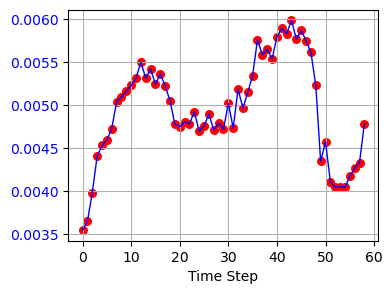

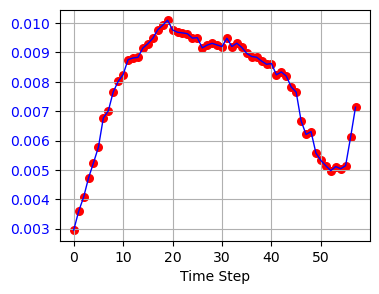

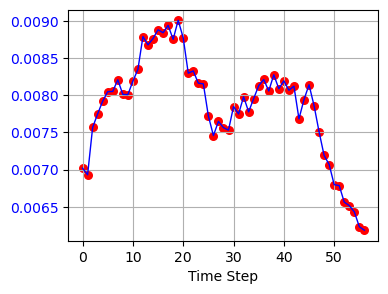

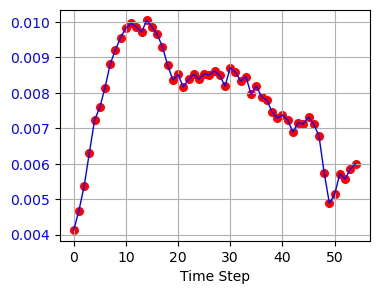

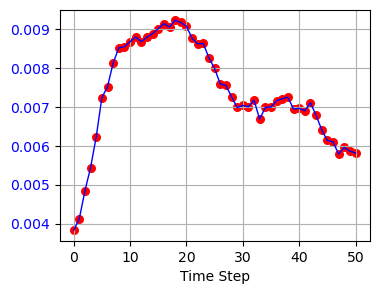

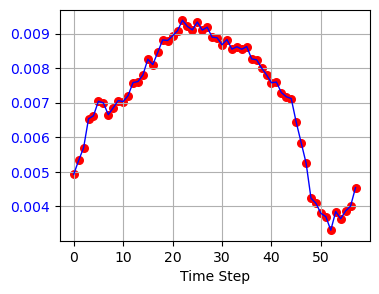

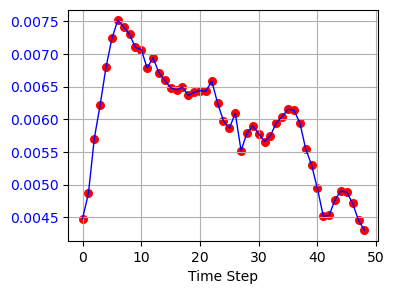

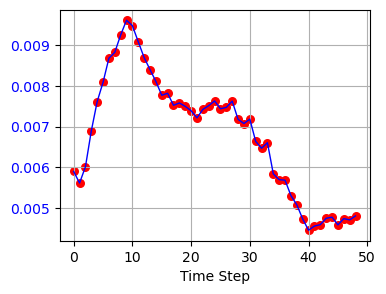

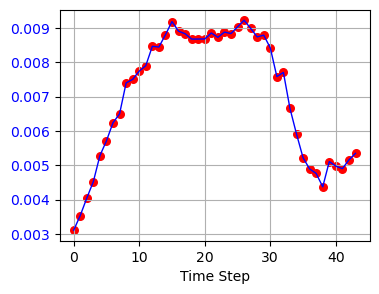

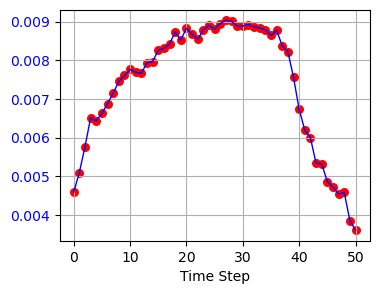

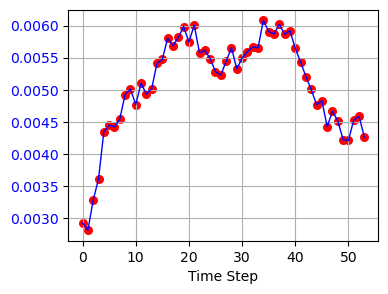

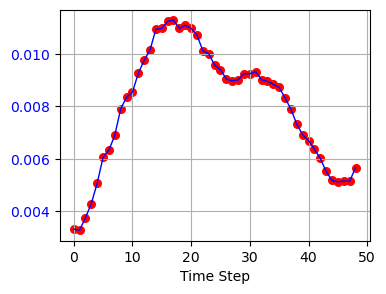

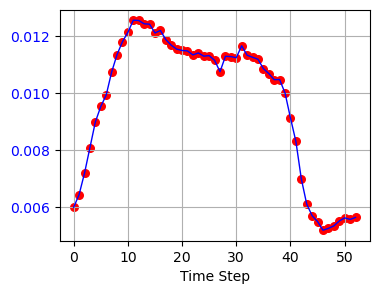

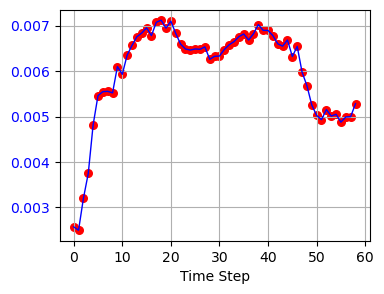

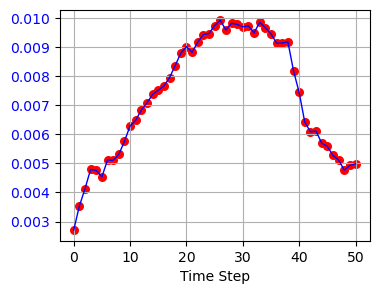

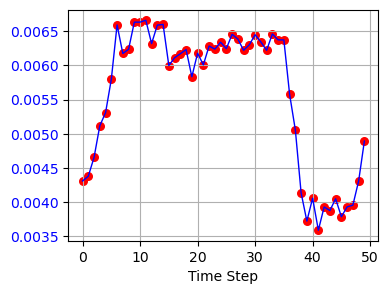

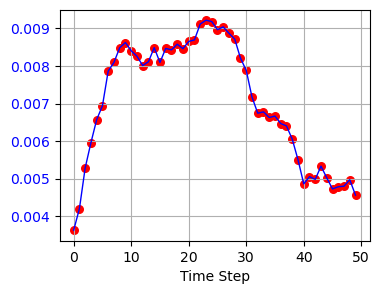

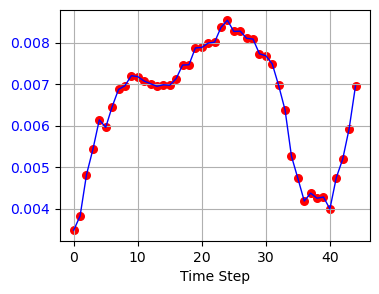

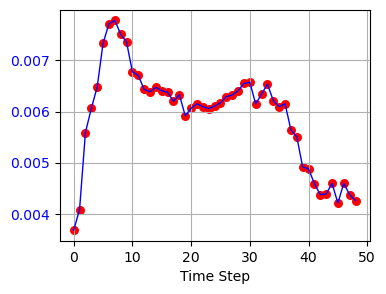

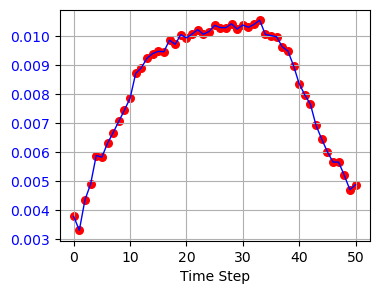

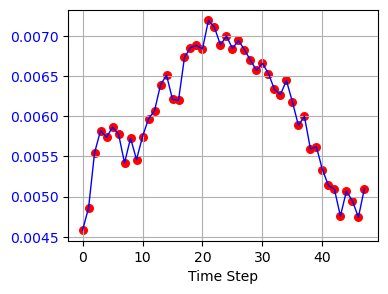

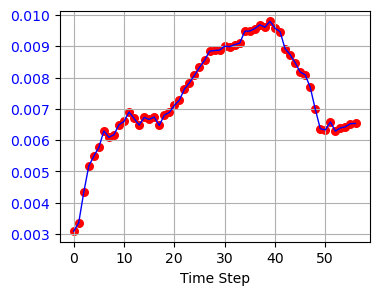

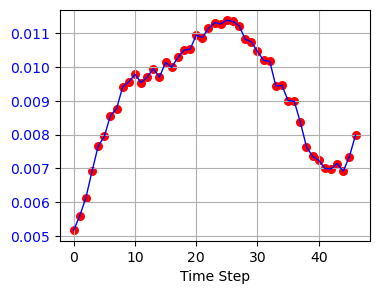

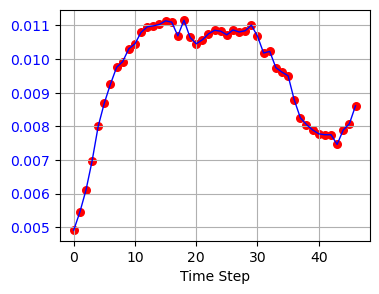

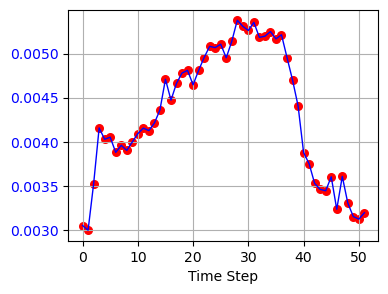

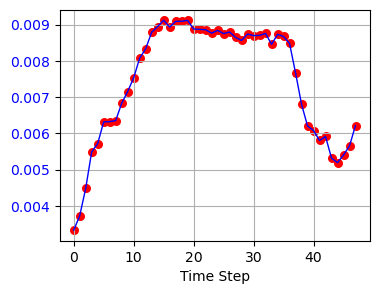

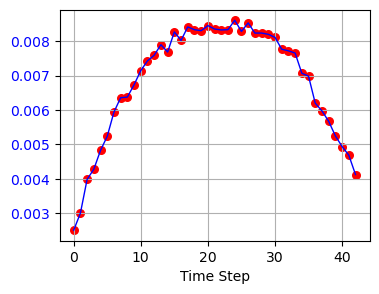

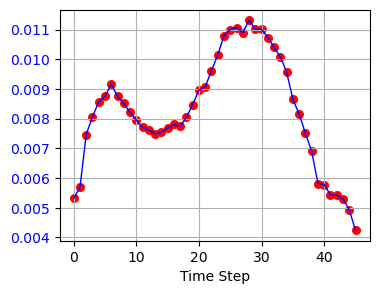

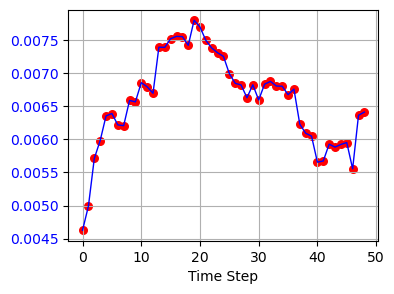

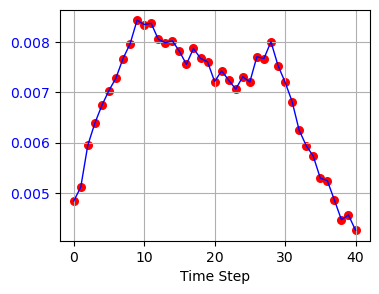

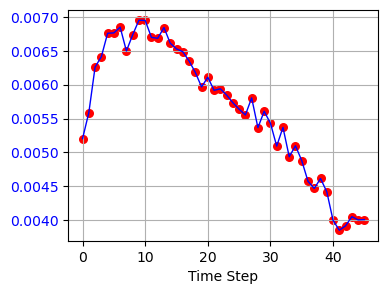

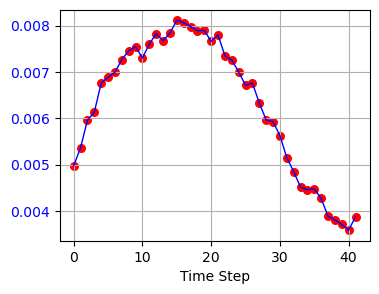

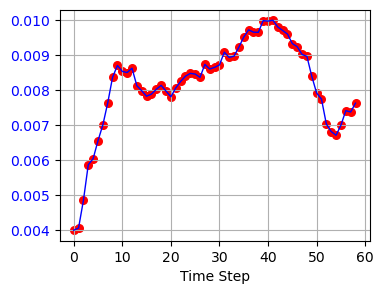

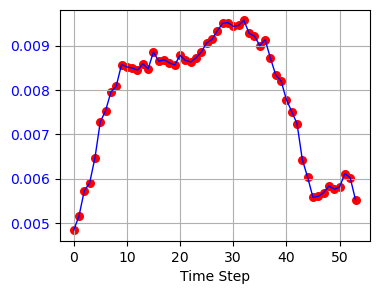

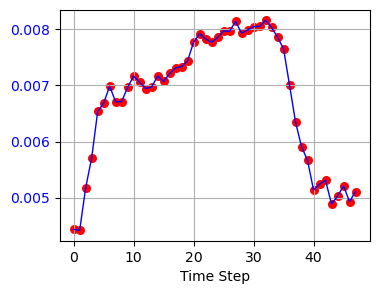

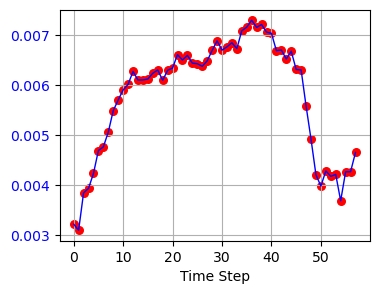

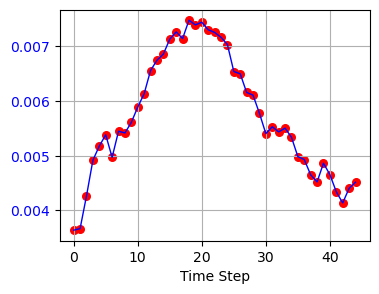

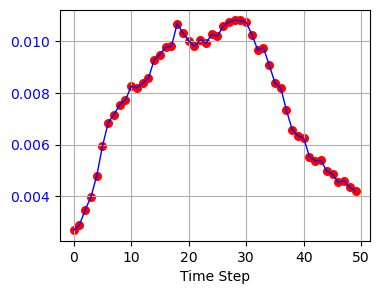

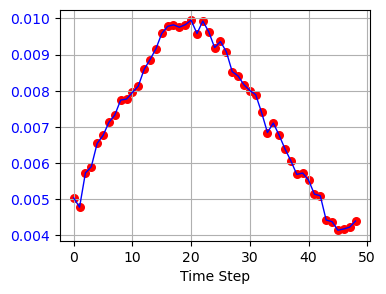

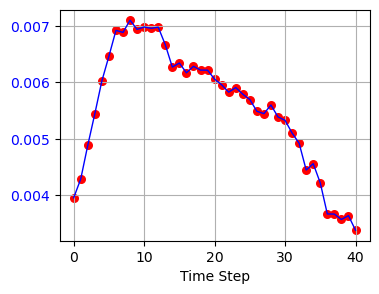

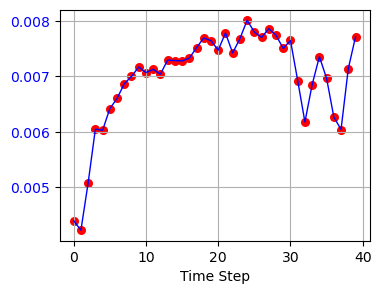

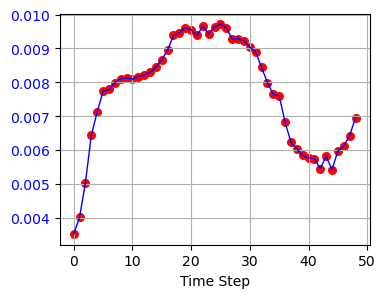

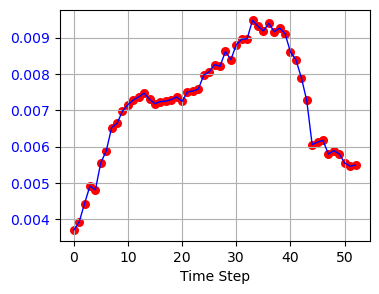

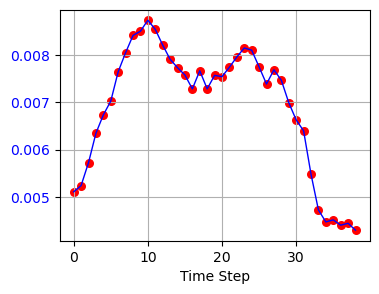

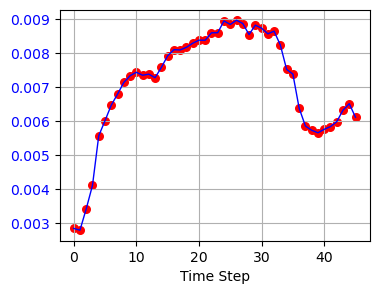

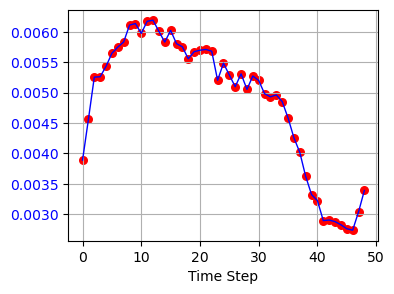

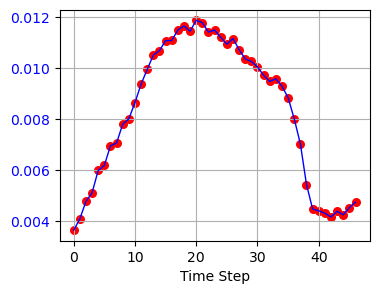

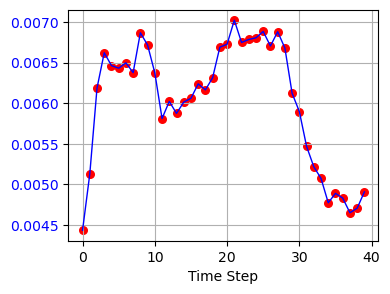

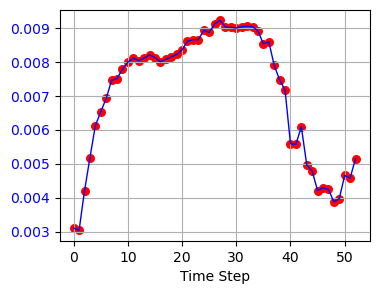

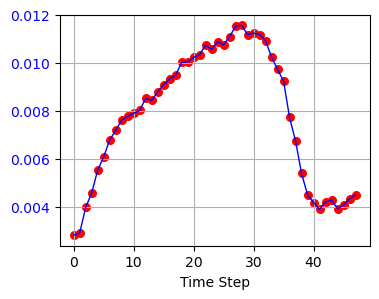

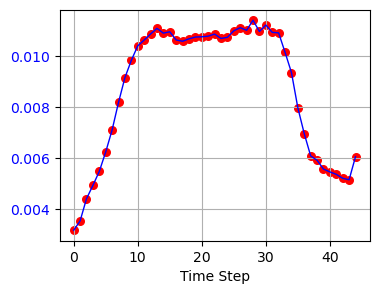

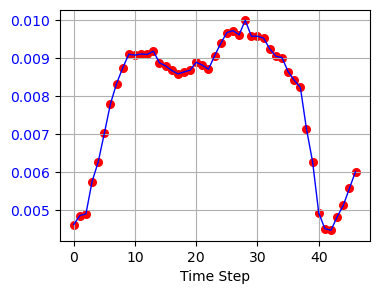

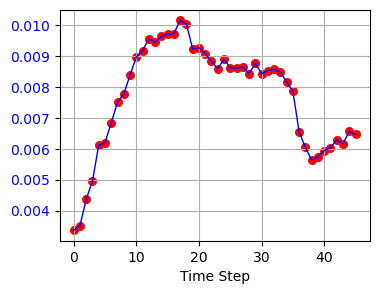

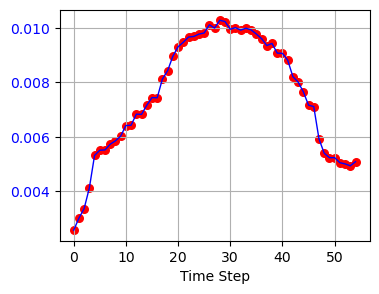

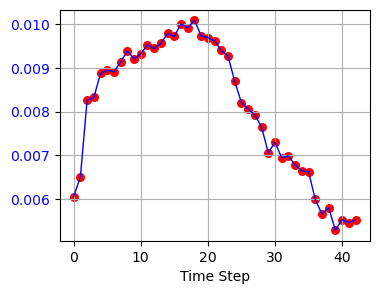

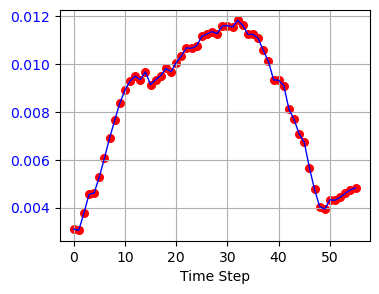

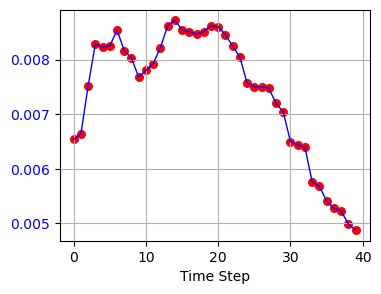

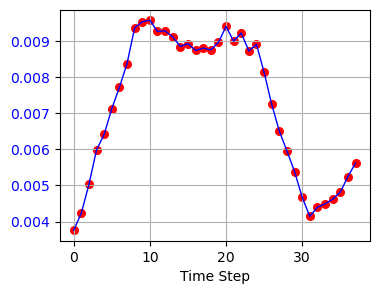

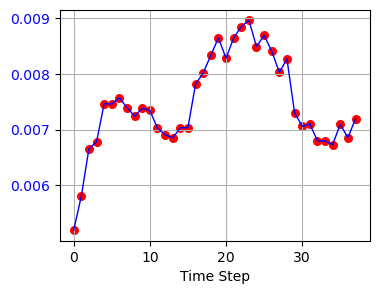

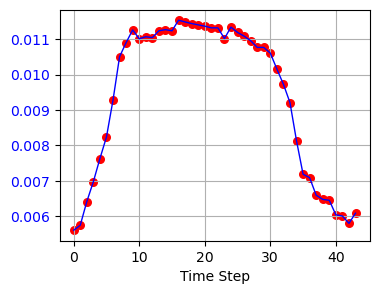

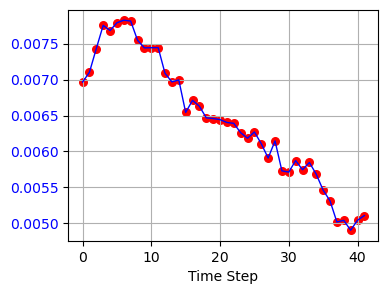

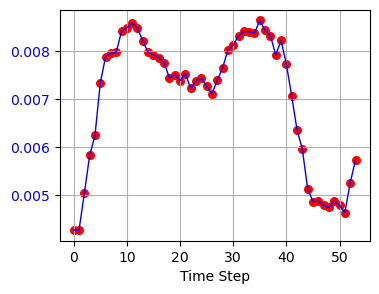

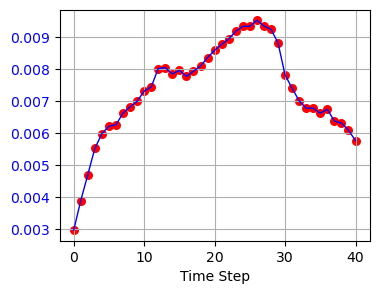

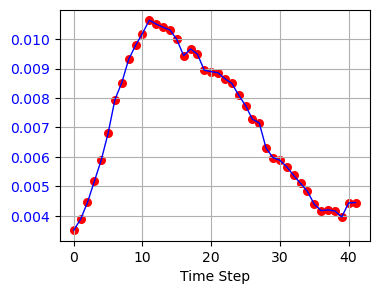

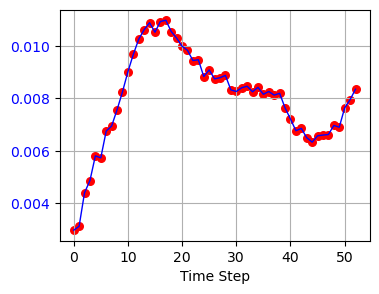

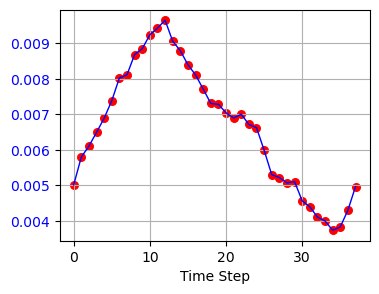

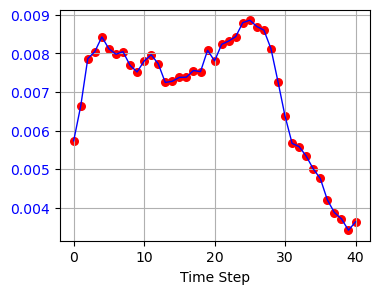

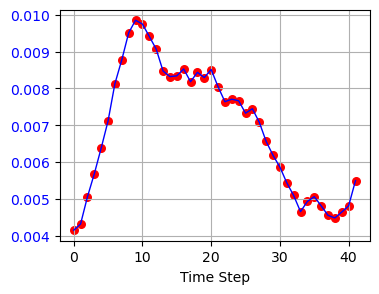

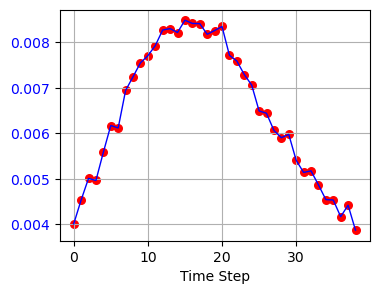

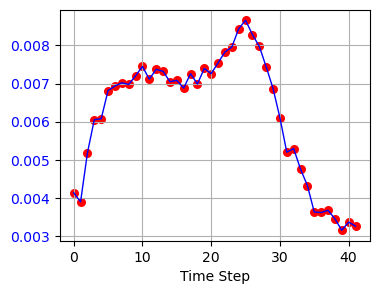

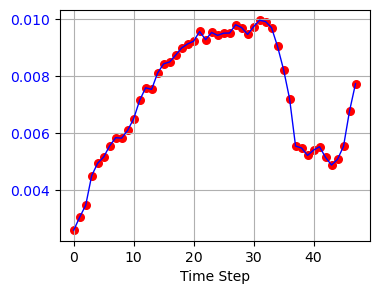

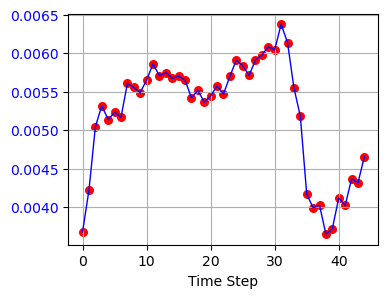

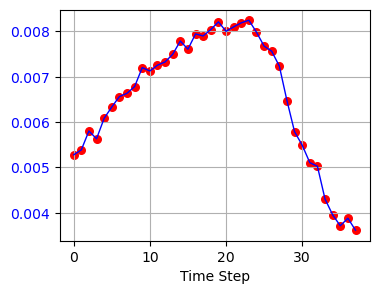

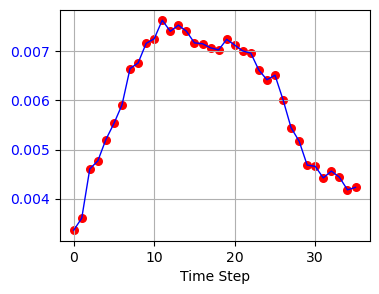

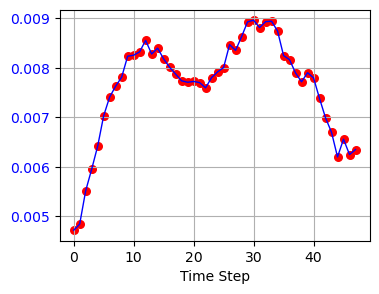

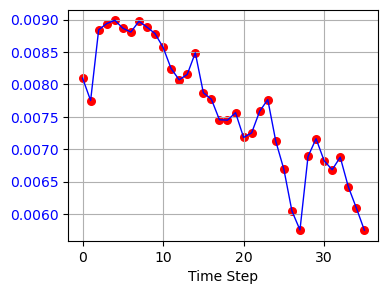

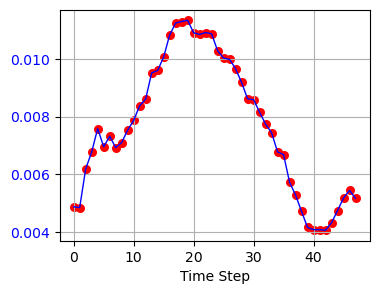

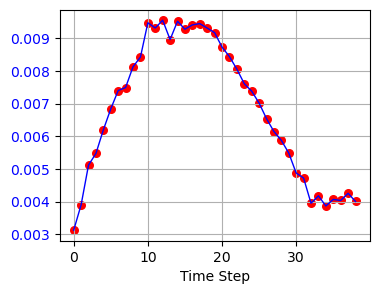

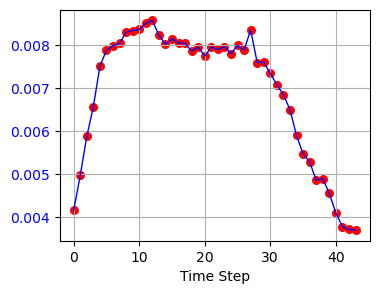

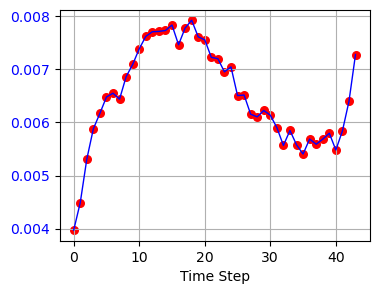

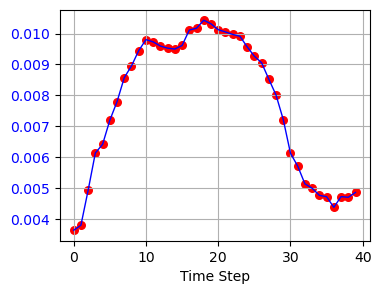

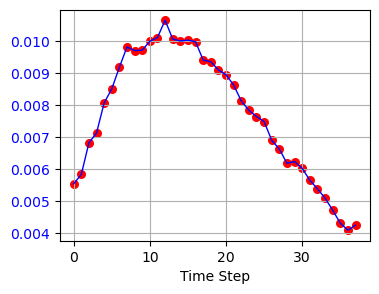

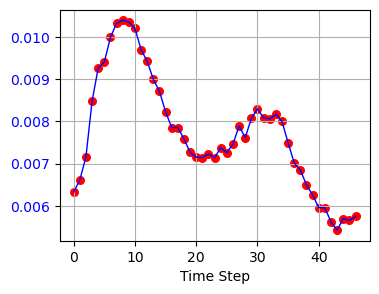

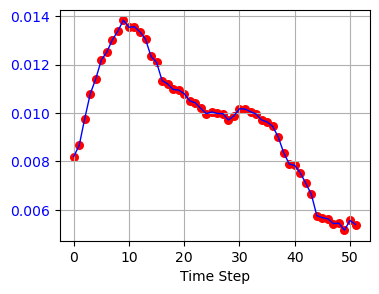

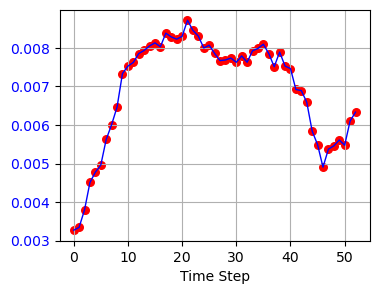

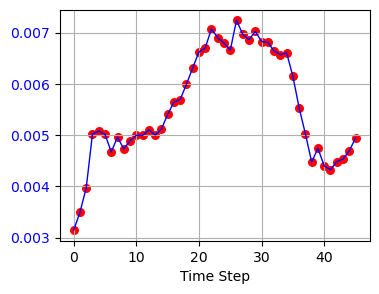

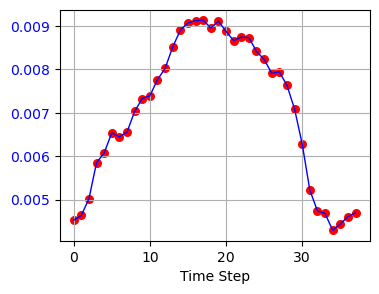

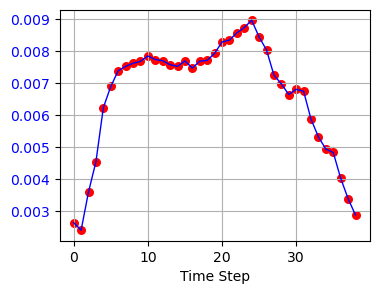

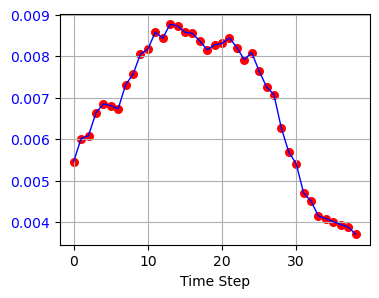

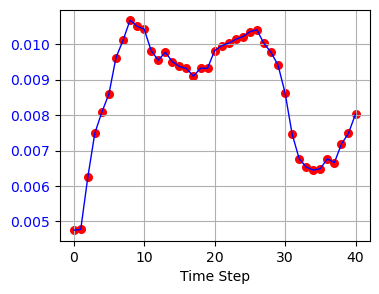

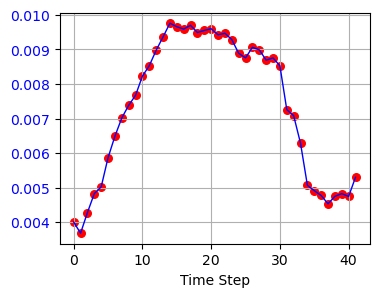

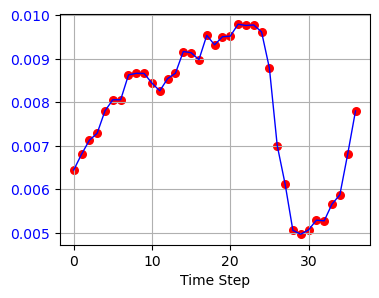

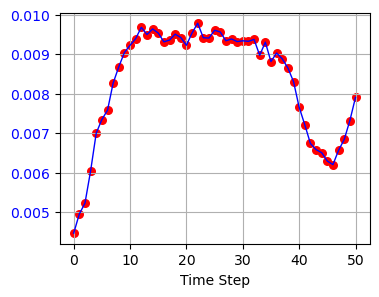

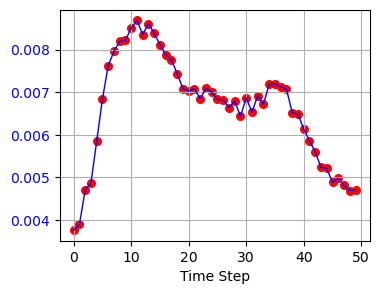

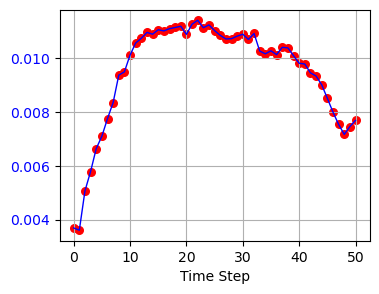

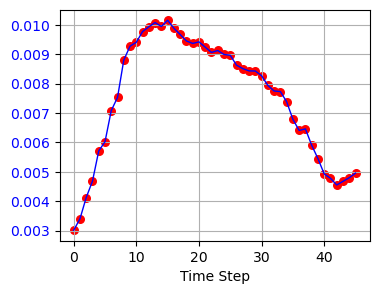

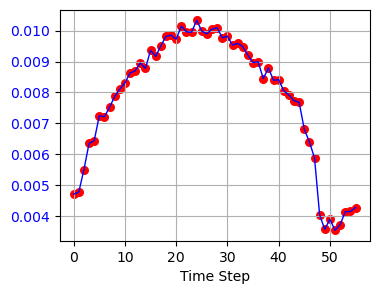

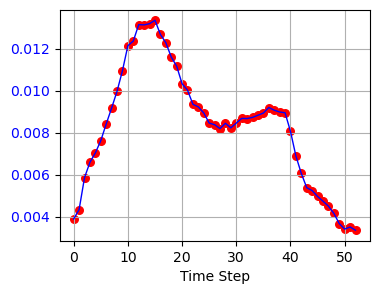

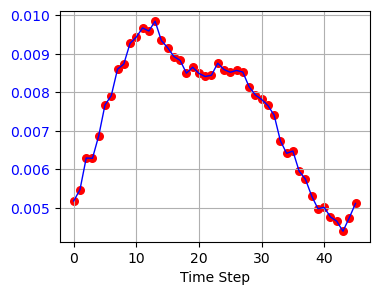

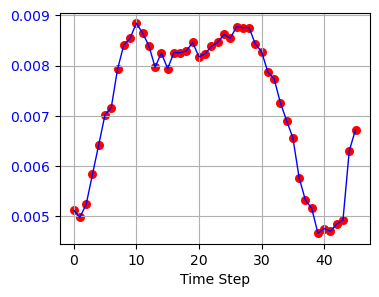

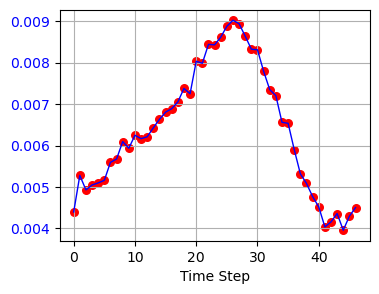

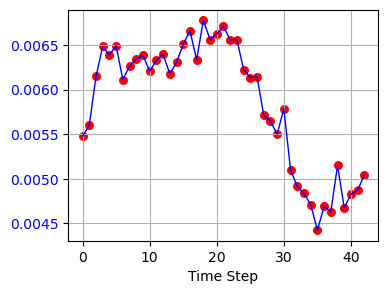

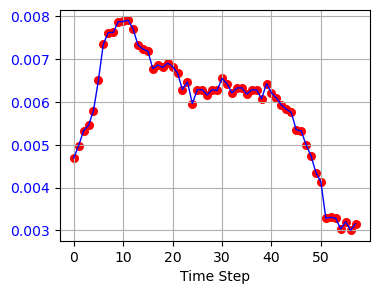

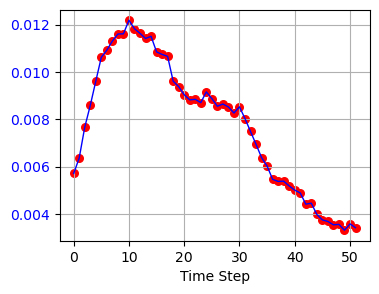

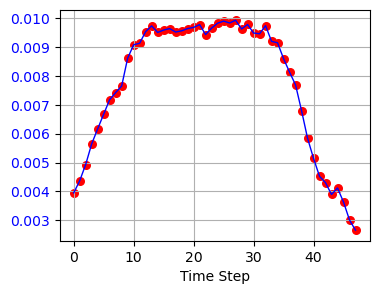

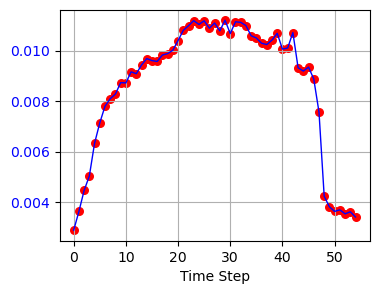

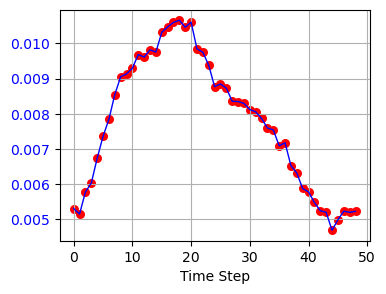

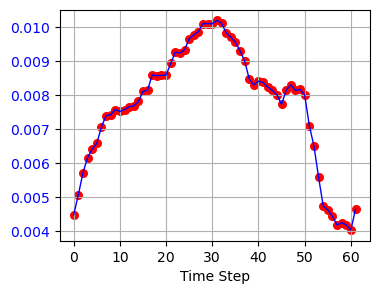

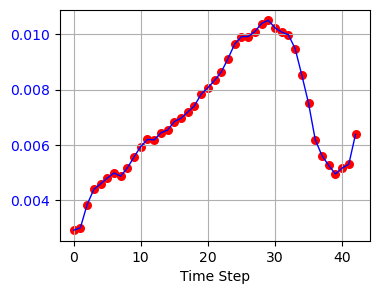

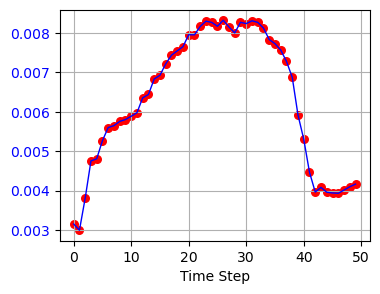

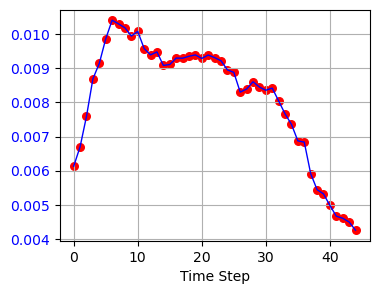

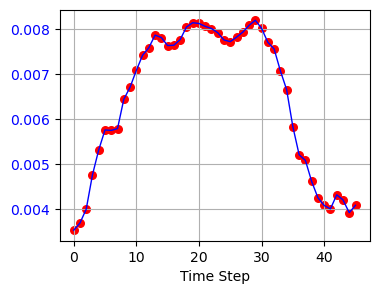

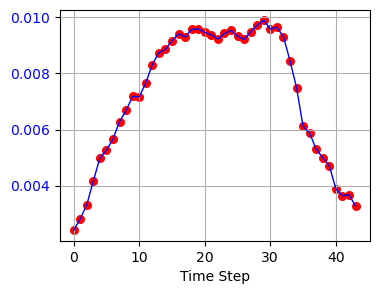

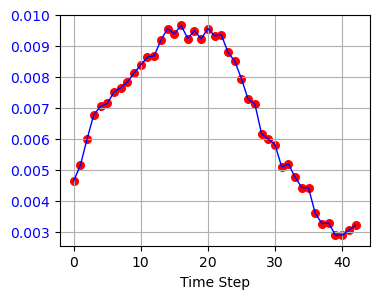

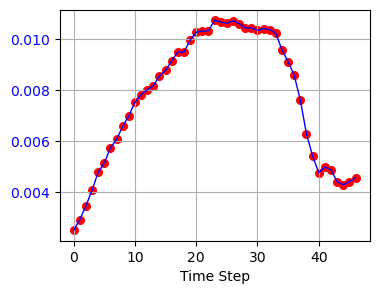

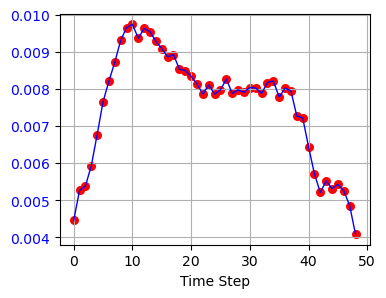

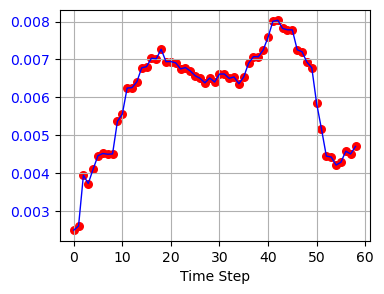

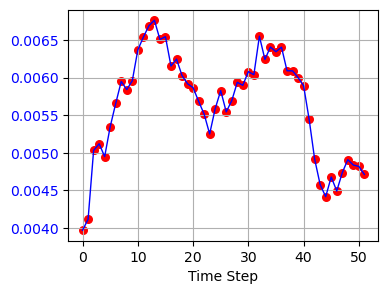

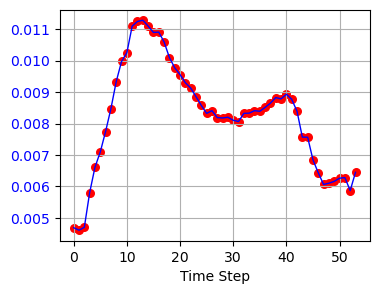

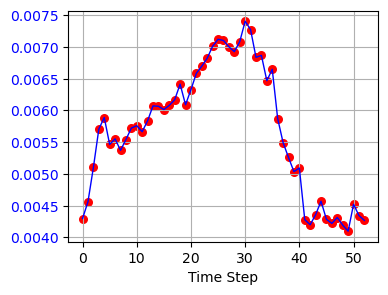

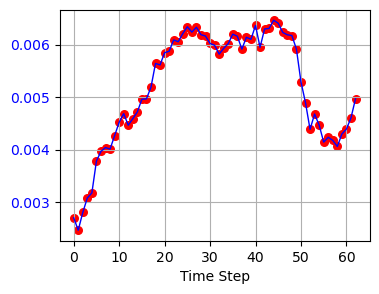

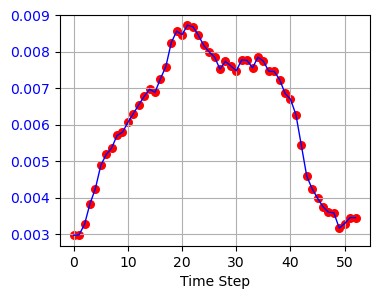

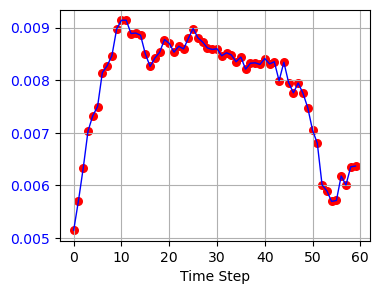

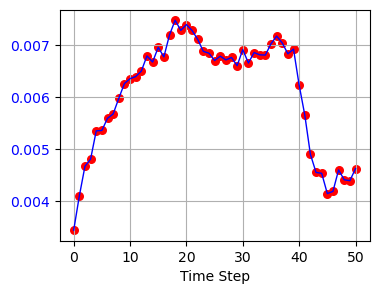

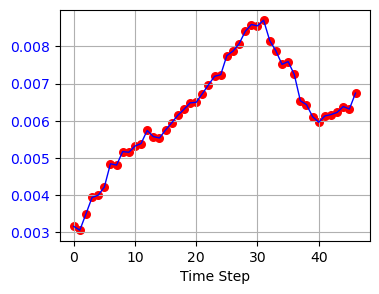

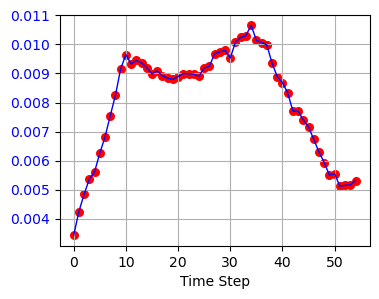

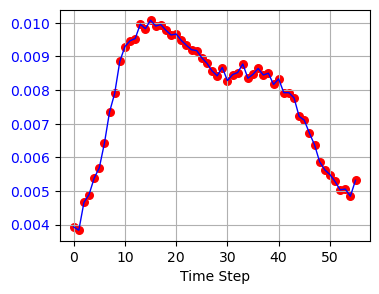

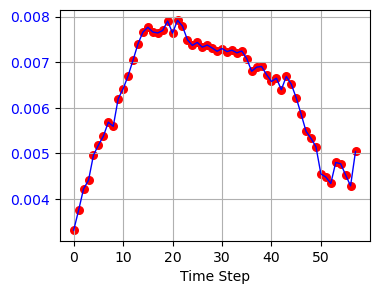

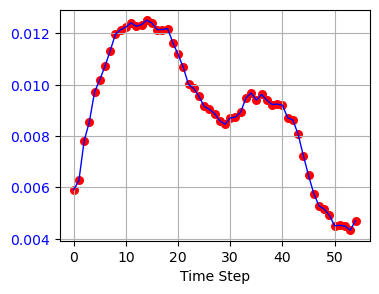

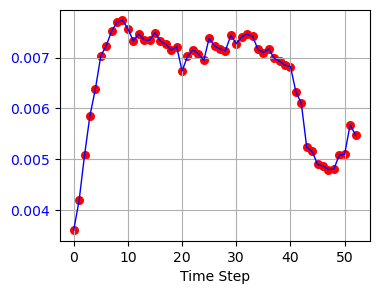

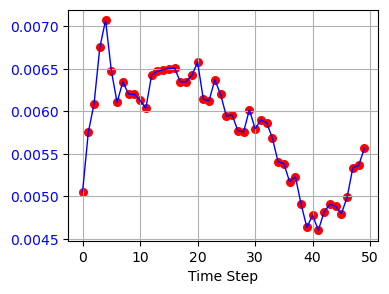

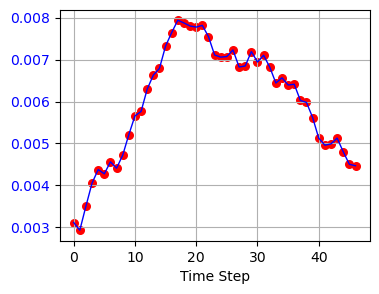

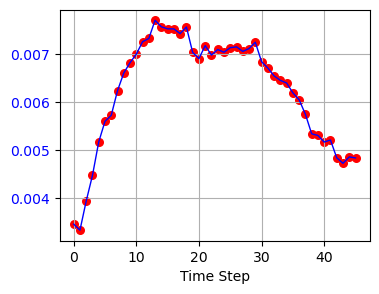

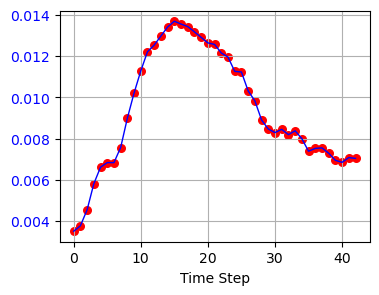

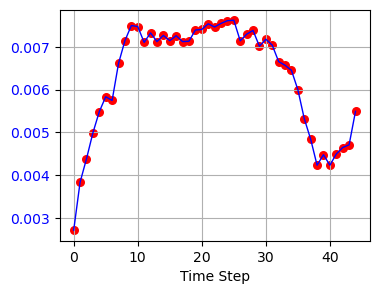

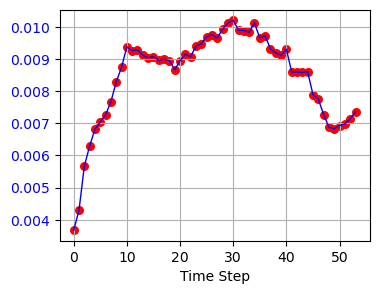

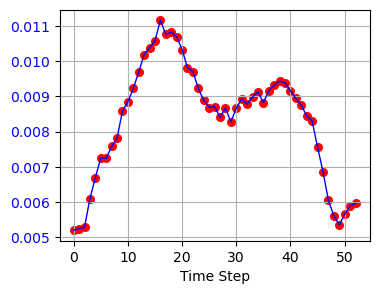

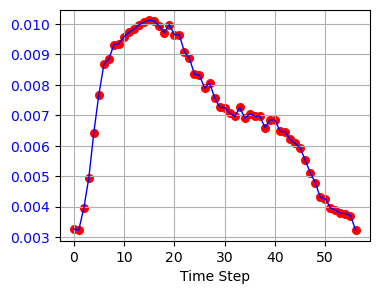

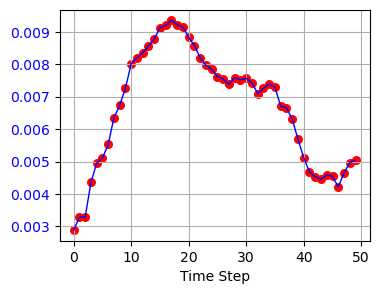

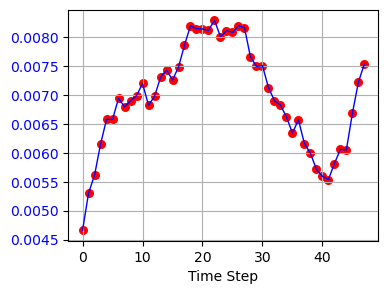

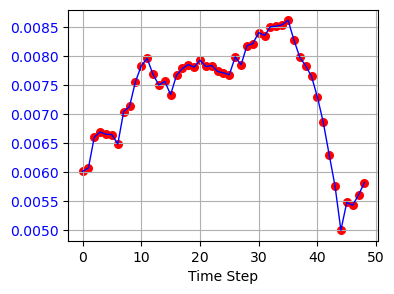

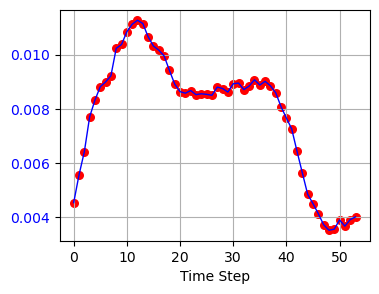

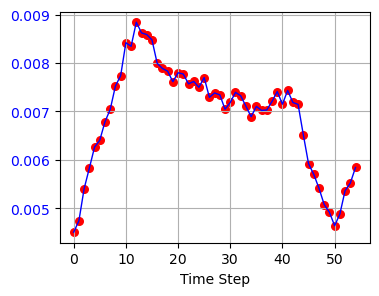

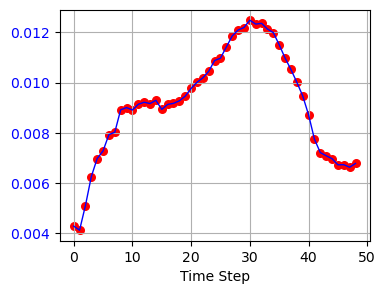

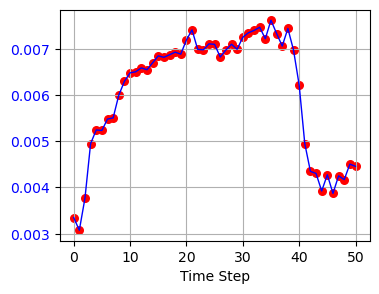

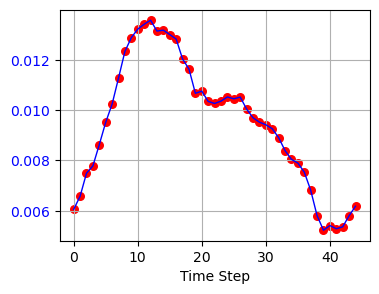

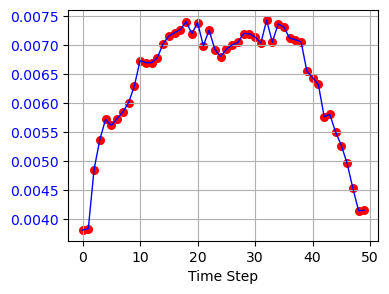

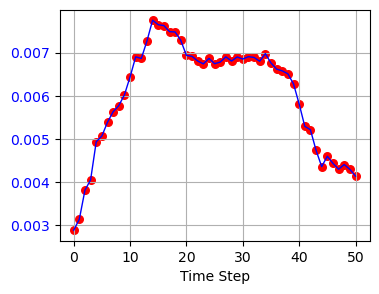

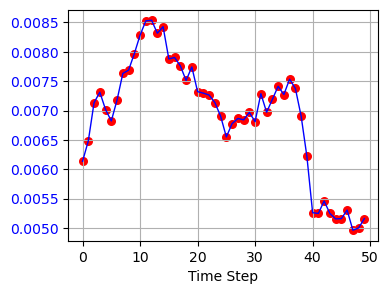

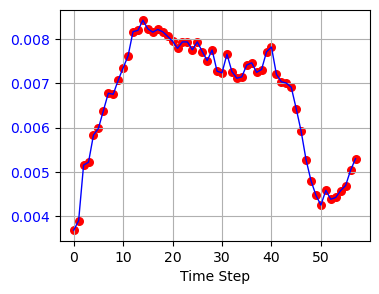

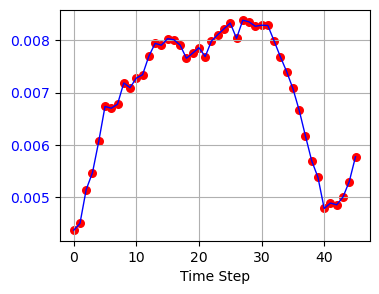

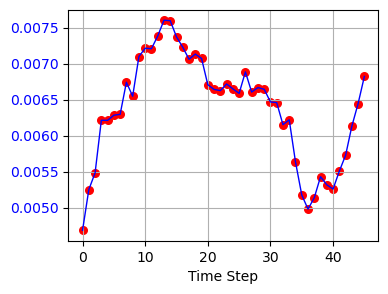

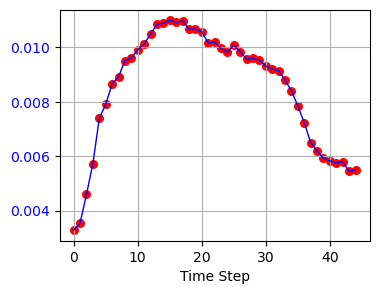

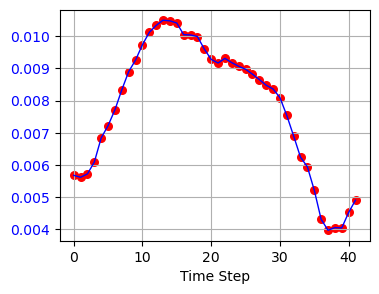

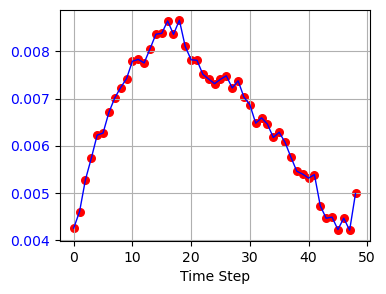

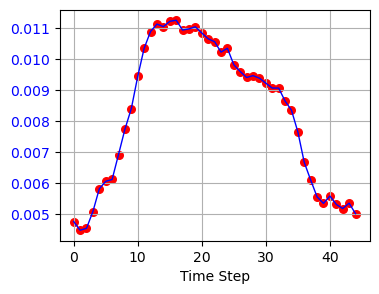

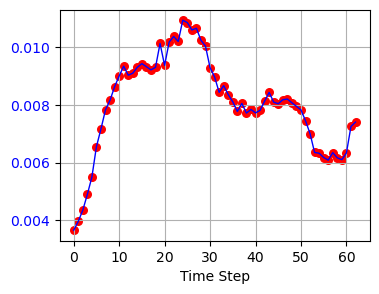

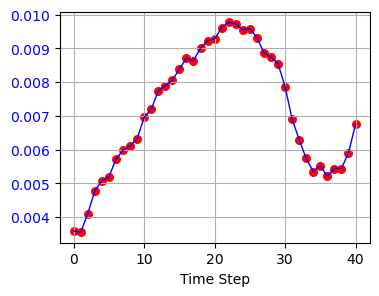

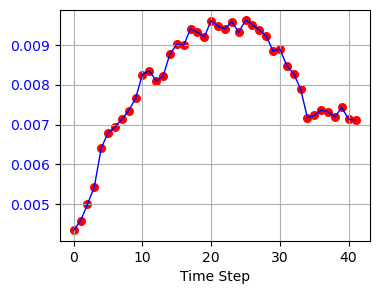

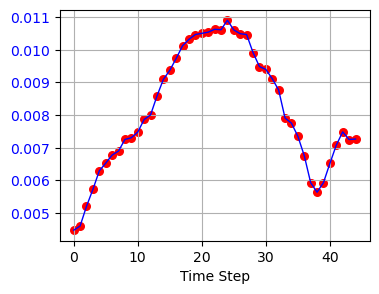

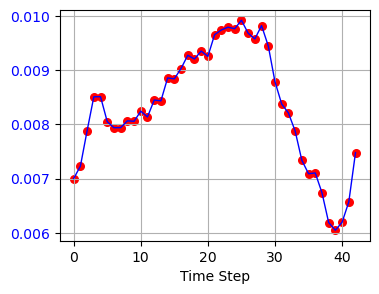

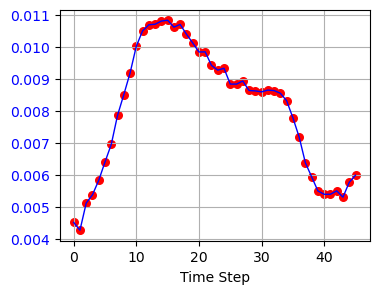

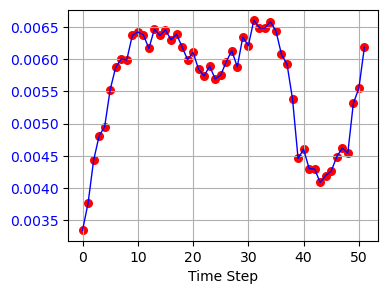

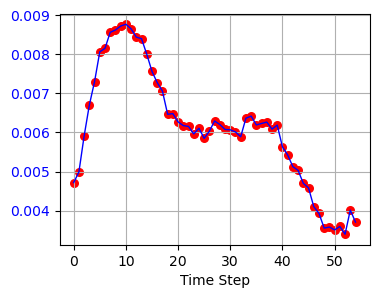

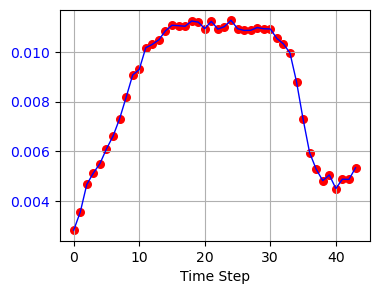

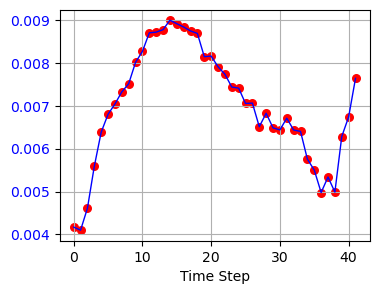

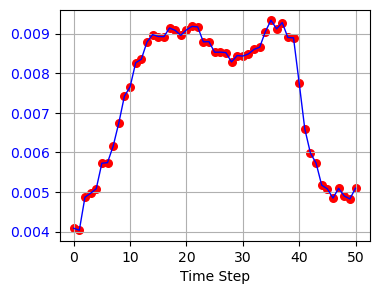

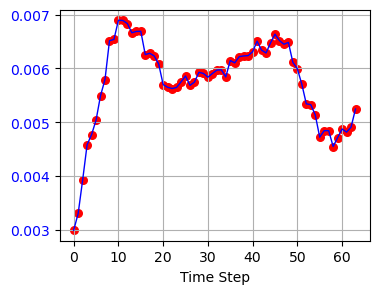

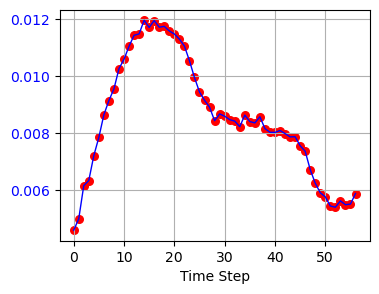

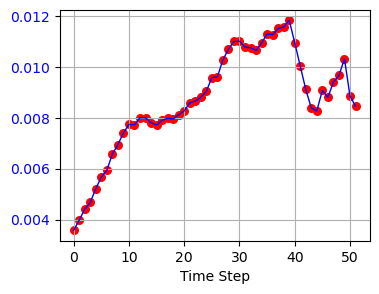

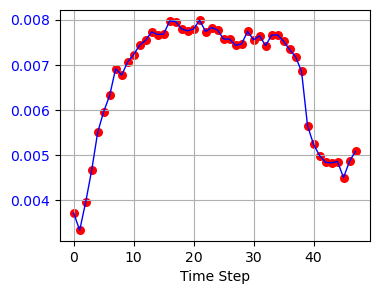

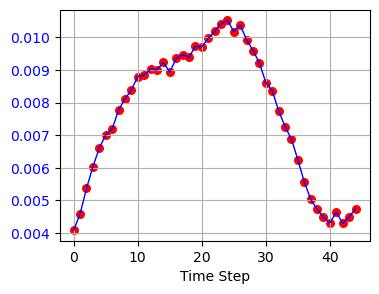

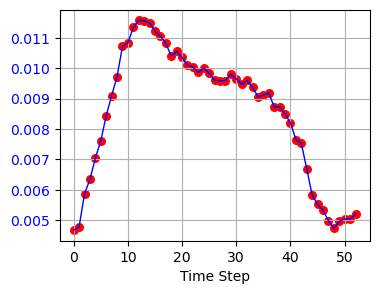

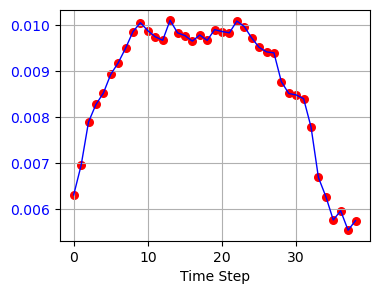

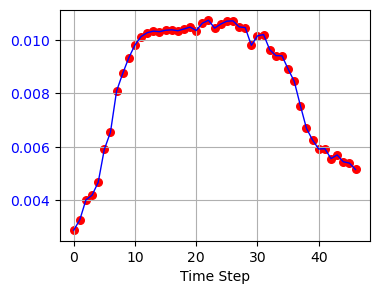

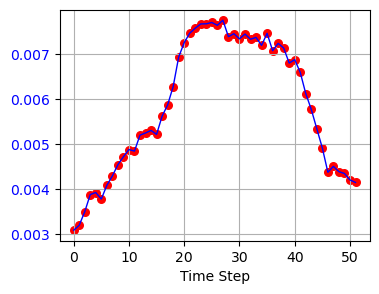

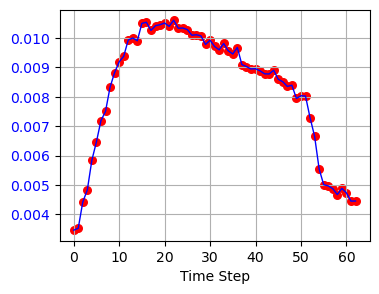

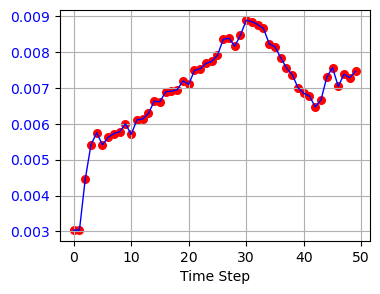

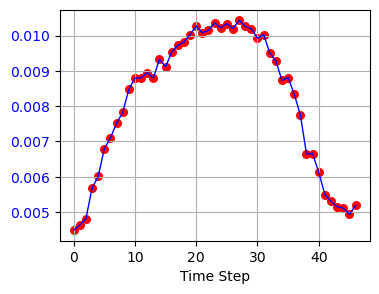

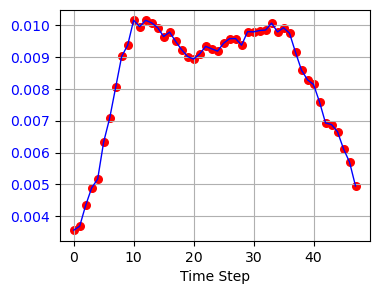

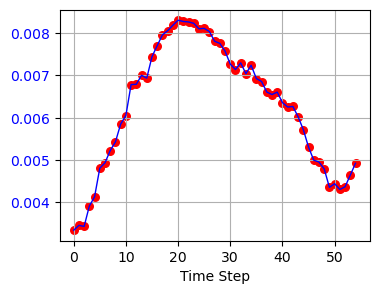

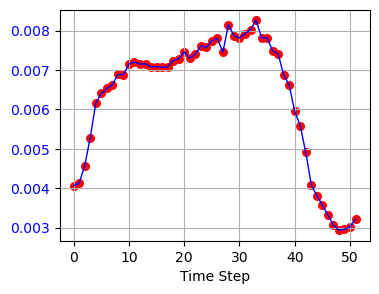

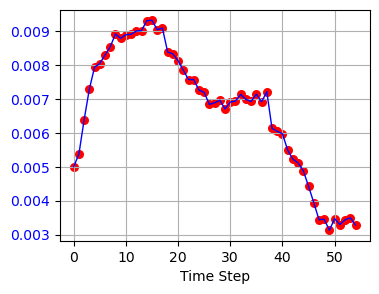

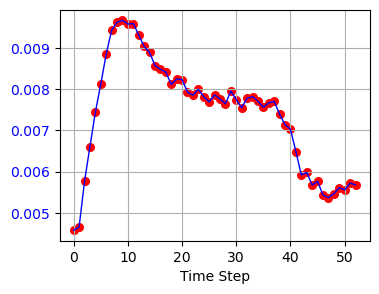

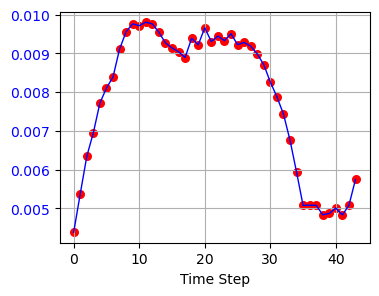

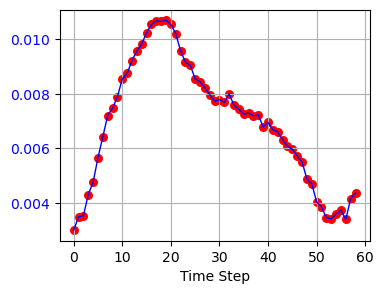

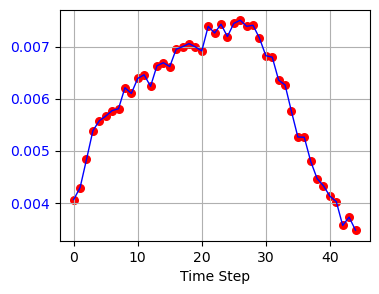

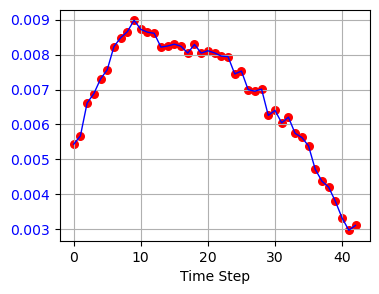

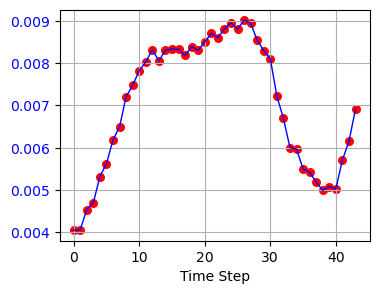

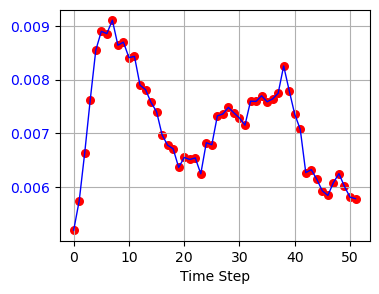

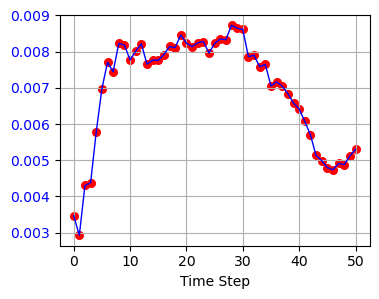

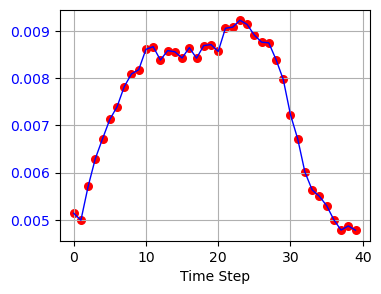

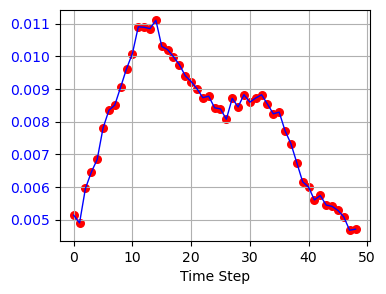

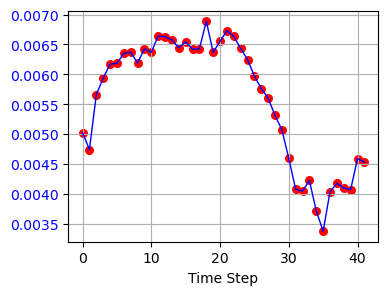

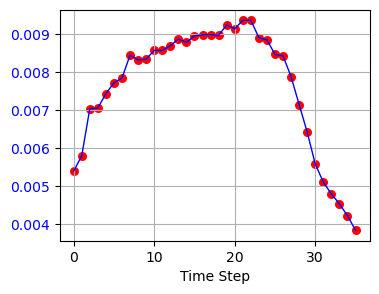

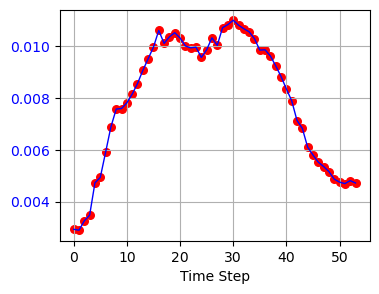

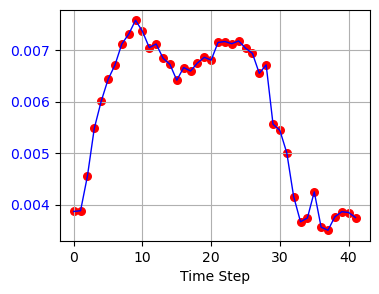

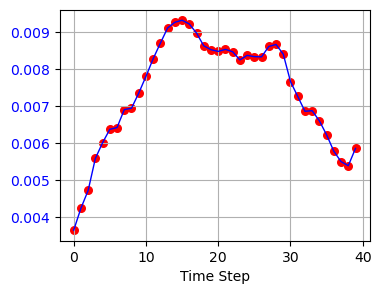

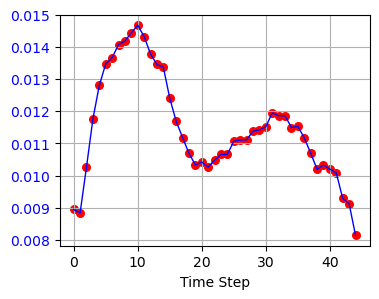

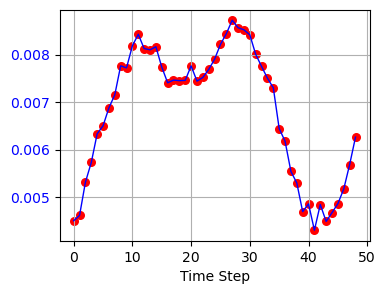

In [5]:
video_dir = "../data/robomimic/datasets/lift/ph/videos_with_spatial_attention_check"
os.makedirs(video_dir, exist_ok=True)

sample = next(iter(dataloader))

_, _, C, H, W = sample['obs']['agentview_image'].shape

iterator = iter(dataloader)
for i in tqdm(range(num_demos)):
    demo_key = f'data/demo_{i}'
    demo = file[demo_key]
    num_samples = demo.attrs['num_samples']
    
    imgs = np.zeros((num_samples, H, 2*W, C), dtype=np.uint8)
    
    for sample_idx in tqdm(range(num_samples), leave=False):        
        sample = next(iterator)
        
        # Transpose from (3,84,84) to (84,84,3) format
        imgs[sample_idx, :, :W, :] = ((sample['obs']['agentview_image'][0, 0].permute(1, 2, 0) * 255).numpy()).astype(np.uint8)
        imgs[sample_idx, :, W:, :] = (sample['obs']['robot0_eye_in_hand_image'][0, 0].permute(1, 2, 0) * 255).numpy().astype(np.uint8)
        
        assert np.linalg.norm(sample['obs']['object'][0, 1, :].numpy()-demo['obs']['object'][sample_idx]) < 1e-4
    
    next(iterator) # Fro syncing
    
    spatial_attention = np.zeros(num_samples, dtype=np.float32)
    demo['spatial_attention'].read_direct(spatial_attention)
    
    if 'spatial_attention' not in demo['obs'].keys():
        demo['obs'].create_dataset(
            'spatial_attention',
            shape=(num_samples,1),   
            data=spatial_attention,
            dtype=np.float32
        )
    else:
        demo['obs']['spatial_attention'][:] = spatial_attention.reshape(-1, 1)
        
    # Get attention graph images
    fig, ax = plt.subplots(figsize=(4, 3))
    time_steps = np.arange(len(spatial_attention))
    ax.plot(time_steps, spatial_attention, 'b-', linewidth=1, label='Spatial Attention')
    ax.set_xlabel('Time Step')
    ax.tick_params(axis='y', labelcolor='b')
    ax.grid(True)
    graph_frames = list()
    for t in range(len(spatial_attention)):
        ax.scatter(t, spatial_attention[t], color='red', s=30)
        
        fig.canvas.draw()
        graph_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        graph_img = graph_img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        graph_frames.append(graph_img)
    graph_height, graph_width = graph_frames[0].shape[:2]
    # prepare combined frames
    
    # attention_data = get_spatial_attention_from_episode(epi)
    combined_frames = list()
    for frame, graph in zip(imgs, graph_frames):
        # Resize frame to match graph height
        frame_height, frame_width = frame.shape[:2]
        aspect_ratio = frame_width / frame_height
        new_height = graph_height
        new_width = int(new_height * aspect_ratio)
        
        frame_resized = np.array(Image.fromarray(frame).resize((new_width, new_height)))
        
        # Create canvas and center the frame
        canvas = np.zeros((graph_height, graph_width+new_width, 3), dtype=np.uint8)
        
        canvas[:, :new_width, :] = frame_resized
        canvas[:, new_width:, :] = graph
        combined_frames.append(canvas)
        
    video_path = os.path.join(video_dir, f"episode_{i}.mp4")
    
    # Create and write video with moviepy
    clip = ImageSequenceClip(combined_frames, fps=10)
    clip.write_videofile(video_path, codec='libx264')


In [6]:
file.close()